# Telecom Churn - Group Case Study
#### Authors
<ul>
    <li>Indranil Banerjee</li>
    <li>Suchismita Panda</li>
</ul>

### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
<br>
<br>
For many incumbent operators, <i><b>retaining high profitable customers is the number one business goal.</b></i>
<br>
<br>
To reduce customer churn, telecom companies need to <b>predict which customers are at high risk of churn.</b>

### Understanding and Defining Churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).
<br>
<br>
In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.
<br>
<br>
However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).
<br>
<br>
Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

### Definitions of Churn
There are various ways to define churn, such as:

<b>Revenue-based churn:</b> Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.
<br>
<br>
The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.
<br>
<br>
<b>Usage-based churn:</b> Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
<br>
<br>
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.
<br>
<br>
In this project, you will use the <b>usage-based definition</b> to define churn.

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator. 

**High-value Churn:**
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

#### Understanding the Business Objective and the Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The **business objective** is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

#### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are **three phases** of customer lifecycle :

<ol>
<li><b>The good phase:</b> In this phase, the customer is happy with the service and behaves as usual.</li>
<li><b>The ‘action’ phase:</b> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)</li>
<li><b>The ‘churn’ phase:</b> In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.</li>
</ol>

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

## Step 1: Reading the Data

In [1]:
# Supress Warnings and import all required packages

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',300)

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, classification_report
from sklearn.decomposition import PCA, IncrementalPCA

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [2]:
# reading the input data and preview
churn= pd.read_csv('telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
#list of columns
pd.DataFrame(churn.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
...,...
221,aon
222,aug_vbc_3g
223,jul_vbc_3g
224,jun_vbc_3g


In [4]:
# Shape of the dataframe
churn.shape

(99999, 226)

## Step 2: Missing Value Analysis and Imputation

In [5]:
# Print column having more than 50% missing values 
missing = 100 * (churn.isnull().sum()/churn.shape[0])
missing.loc[missing > 50]

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

Although above 40 columns are having missing values more than 70 percent but these column are important except last recharge date. We can impute 0 for these columns and drop last recharge columns

In [6]:
columns_to_impute =['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9',
'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

for col in columns_to_impute:
    churn[col].fillna(0, inplace=True)

In [7]:
columns_to_drop = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
                   'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

churn.drop(columns_to_drop, axis=1, inplace=True)
churn.shape

(99999, 222)

In [8]:
# Print column having more than 5% missing values 
missing = 100 * (churn.isnull().sum()/churn.shape[0])
missing.loc[missing > 5]

onnet_mou_8         5.378054
onnet_mou_9         7.745077
offnet_mou_8        5.378054
offnet_mou_9        7.745077
roam_ic_mou_8       5.378054
roam_ic_mou_9       7.745077
roam_og_mou_8       5.378054
roam_og_mou_9       7.745077
loc_og_t2t_mou_8    5.378054
loc_og_t2t_mou_9    7.745077
loc_og_t2m_mou_8    5.378054
loc_og_t2m_mou_9    7.745077
loc_og_t2f_mou_8    5.378054
loc_og_t2f_mou_9    7.745077
loc_og_t2c_mou_8    5.378054
loc_og_t2c_mou_9    7.745077
loc_og_mou_8        5.378054
loc_og_mou_9        7.745077
std_og_t2t_mou_8    5.378054
std_og_t2t_mou_9    7.745077
std_og_t2m_mou_8    5.378054
std_og_t2m_mou_9    7.745077
std_og_t2f_mou_8    5.378054
std_og_t2f_mou_9    7.745077
std_og_t2c_mou_8    5.378054
std_og_t2c_mou_9    7.745077
std_og_mou_8        5.378054
std_og_mou_9        7.745077
isd_og_mou_8        5.378054
isd_og_mou_9        7.745077
spl_og_mou_8        5.378054
spl_og_mou_9        7.745077
og_others_8         5.378054
og_others_9         7.745077
loc_ic_t2t_mou

There are 58 features having more than 5% missing values. We can impute 0 for these missing values

In [9]:
columns_to_impute = ['onnet_mou_8', 'onnet_mou_9', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_8', 'roam_ic_mou_9',
                     'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_8',
                     'loc_og_t2m_mou_9', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_8',
                     'loc_og_t2c_mou_9', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9',
                     'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9',
                     'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_mou_8', 'std_og_mou_9', 'isd_og_mou_8',
                     'isd_og_mou_9', 'spl_og_mou_8', 'spl_og_mou_9', 'og_others_8', 'og_others_9',
                     'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9',
                     'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_t2t_mou_8',
                     'std_ic_t2t_mou_9', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_8',
                     'std_ic_t2f_mou_9', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_ic_mou_8', 'std_ic_mou_9',
                     'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_8', 'ic_others_9']

for col in columns_to_impute:
    churn[col].fillna(0, inplace=True)

In [10]:
# Print column having more than 5% missing values 
missing = 100 * (churn.isnull().sum()/churn.shape[0])
missing.loc[missing > 2]

onnet_mou_6            3.937039
onnet_mou_7            3.859039
offnet_mou_6           3.937039
offnet_mou_7           3.859039
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2f_mou_6       3.937039
loc_og_t2f_mou_7       3.859039
loc_og_t2c_mou_6       3.937039
loc_og_t2c_mou_7       3.859039
loc_og_mou_6           3.937039
loc_og_mou_7           3.859039
std_og_t2t_mou_6       3.937039
std_og_t2t_mou_7       3.859039
std_og_t2m_mou_6       3.937039
std_og_t2m_mou_7       3.859039
std_og_t2f_mou_6       3.937039
std_og_t2f_mou_7       3.859039
std_og_t2c_mou_6       3.937039
std_og_t2c_mou_7       3.859039
std_og_mou_6           3.937039
std_og_mou_7           3.859039
isd_og_mou_6           3.937039
isd_og_mou_7           3.859039
spl_og_mou_6           3.937039
spl_og_m

In [11]:
missing_columns = ['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
                     'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6',
                     'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6',
                     'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
                     'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
                     'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6',
                     'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7', 'loc_ic_t2t_mou_6',
                     'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
                     'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
                     'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
                     'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_mou_6', 'std_ic_mou_7', 'spl_ic_mou_6',
                     'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 'ic_others_6', 'ic_others_7',
                     'date_of_last_rech_8', 'date_of_last_rech_9']

churn[churn[missing_columns].isnull().all(axis=1)][missing_columns].head()

,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For above missing values we can drop the customer data from the dataframe

In [12]:
churn=churn[~churn[missing_columns].isnull().all(axis=1)]
churn.shape

(99617, 222)

For other customers we can impute missing values as zero

In [13]:
missing_columns.remove('date_of_last_rech_8')
missing_columns.remove('date_of_last_rech_9')
for col in missing_columns:
    churn[col].fillna(0, inplace=True)

In [14]:
# Check for missing values
missing = 100 * (churn.isnull().sum()/churn.shape[0])
missing.loc[missing > 0]

loc_og_t2o_mou          0.639449
std_og_t2o_mou          0.639449
loc_ic_t2o_mou          0.639449
last_date_of_month_7    0.318219
last_date_of_month_8    0.753887
last_date_of_month_9    1.300983
date_of_last_rech_6     1.486694
date_of_last_rech_7     1.465613
date_of_last_rech_8     3.252457
date_of_last_rech_9     4.394832
dtype: float64

Lets impute columns 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9' with mode

In [15]:
impute_mode = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8',
               'last_date_of_month_9']
for col in impute_mode:
    churn[col].fillna(churn[col].mode()[0], inplace=True)

In [16]:
# Check for missing values
missing = 100 * (churn.isnull().sum()/churn.shape[0])
missing.loc[missing > 0]

date_of_last_rech_6    1.486694
date_of_last_rech_7    1.465613
date_of_last_rech_8    3.252457
date_of_last_rech_9    4.394832
dtype: float64

Lets impute the missing values with end date for the month

In [17]:
churn['date_of_last_rech_6'].fillna('6/30/2014', inplace=True)
churn['date_of_last_rech_7'].fillna('7/31/2014', inplace=True)
churn['date_of_last_rech_8'].fillna('8/31/2014', inplace=True)
churn['date_of_last_rech_9'].fillna('9/30/2014', inplace=True)

In [18]:
# Check for missing values
missing = 100 * (churn.isnull().sum()/churn.shape[0])
missing.loc[missing > 0]

Series([], dtype: float64)

No missing values are present in the dataframe

In [19]:
# check for columns which are having all the values as zero
columns_zero_values=churn.columns[(churn == 0).all()]
columns_zero_values

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

We can drop the columns 

In [20]:
churn.drop(columns_zero_values,axis=1,inplace=True)

In [21]:
# Check shape of the dataframe
churn.shape

(99617, 211)

In [22]:
# Convert datatime column to datatime datatype
date_columns = list(churn.filter(regex='date').columns)
for col in date_columns:
    churn[col] = pd.to_datetime(churn[col], format='%m/%d/%Y')

In [23]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99617 entries, 0 to 99998
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 161.1 MB


In [24]:
# Rename columns properly
churn.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

#### Create New Feature

In [25]:
# total data usage for each month
churn['vol_data_mb_6'] = (churn['vol_2g_mb_6']+churn['vol_3g_mb_6']).astype(int)
churn['vol_data_mb_7'] = (churn['vol_2g_mb_7']+churn['vol_3g_mb_7']).astype(int)
churn['vol_data_mb_8'] = (churn['vol_2g_mb_8']+churn['vol_3g_mb_8']).astype(int)
churn['vol_data_mb_9'] = (churn['vol_2g_mb_9']+churn['vol_3g_mb_9']).astype(int)

In [26]:
# average recharge amount for each month
churn['avg_rech_amt_6'] = round(churn['total_rech_amt_6']/churn['total_rech_num_6']+1, 2)
churn['avg_rech_amt_7'] = round(churn['total_rech_amt_7']/churn['total_rech_num_7']+1, 2)
churn['avg_rech_amt_8'] = round(churn['total_rech_amt_8']/churn['total_rech_num_8']+1, 2)
churn['avg_rech_amt_9'] = round(churn['total_rech_amt_9']/churn['total_rech_num_9']+1, 2)

churn['avg_rech_amt_6'].fillna(0, inplace=True)
churn['avg_rech_amt_7'].fillna(0, inplace=True)
churn['avg_rech_amt_8'].fillna(0, inplace=True)
churn['avg_rech_amt_9'].fillna(0, inplace=True)

In [27]:
# Count of total data recharge
churn['total_rech_num_data_6'] = (churn['count_rech_2g_6']+churn['count_rech_3g_6']).astype(int)
churn['total_rech_num_data_7'] = (churn['count_rech_2g_7']+churn['count_rech_3g_7']).astype(int)
churn['total_rech_num_data_8'] = (churn['count_rech_2g_8']+churn['count_rech_3g_8']).astype(int)
churn['total_rech_num_data_9'] = (churn['count_rech_2g_9']+churn['count_rech_3g_9']).astype(int)

In [28]:
# Total data recharge amount for each month
churn['total_rech_amt_data_6'] = churn['total_rech_num_data_6'] * churn['av_rech_amt_data_6']
churn['total_rech_amt_data_7'] = churn['total_rech_num_data_7'] * churn['av_rech_amt_data_7']
churn['total_rech_amt_data_8'] = churn['total_rech_num_data_8'] * churn['av_rech_amt_data_8']
churn['total_rech_amt_data_9'] = churn['total_rech_num_data_9'] * churn['av_rech_amt_data_9']

In [29]:
# Total Rechnage amount for each month
churn['total_month_rech_6'] = churn['total_rech_amt_6']+churn['total_rech_amt_data_6']
churn['total_month_rech_7'] = churn['total_rech_amt_7']+churn['total_rech_amt_data_7']
churn['total_month_rech_8'] = churn['total_rech_amt_8']+churn['total_rech_amt_data_8']
churn['total_month_rech_9'] = churn['total_rech_amt_9']+churn['total_rech_amt_data_8']

#### Filter High Value Customer

In [30]:
avg_month_6_7 =(churn.total_month_rech_6 + churn.total_month_rech_7)/2
cutoff= np.percentile(avg_month_6_7, 70)
hv_customers = churn[avg_month_6_7 >=  cutoff]
hv_customers.reset_index(inplace=True,drop=True)
hv_customers.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [31]:
hv_customers.shape

(29906, 231)

#### Calculate Churn Variable

In [32]:
churn_features= ['vol_2g_mb_9','vol_3g_mb_9','total_ic_mou_9','total_og_mou_9']
flag = ~hv_customers[[s for s in churn_features ]].any(axis=1)
hv_customers['churn'] = flag.map({True:1, False:0})
hv_customers.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9,churn
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [33]:
hv_customers['churn'].value_counts(normalize=True) * 100

0    91.914666
1     8.085334
Name: churn, dtype: float64

#### We have only 8% customer as churned

As we have calculated Churn Variable we can drop all the columns related to month 9

In [34]:
month_9_columns = hv_customers.filter(regex=('_9')).columns
hv_customers.drop(month_9_columns,axis=1,inplace=True)

## Step 3: Data Visualization and EDA

In [35]:
hv_customers.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,113,152,115,91.50,85.00,127.00,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1
1,7000701601,109,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,

#### drop column which are not important for analysis

In [36]:
columns_to_drop = ['circle_id', 'last_date_of_month_6', 'last_date_of_month_7',
                  'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7',
                   'date_of_last_rech_8']

hv_customers.drop(columns_to_drop, axis=1, inplace=True)

In [37]:
hv_customers.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,113,152,115,91.50,85.00,127.00,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0

### Univariate Analsysis

In [38]:
# Create Helper Function
def Create_BoxPlot_DistributionPlot(column, Col_description):
    # Plot Box Plot and Distribution Plot
    plt.figure(figsize=(15, 15))
    sns.set_style('whitegrid')

    plt.subplot(3,2,1)
    ax = sns.boxplot(hv_customers[column + '_6'])
    ax.set_xlabel(Col_description + ' Month 6', size=12)

    plt.subplot(3,2,2)
    ax = sns.distplot(hv_customers[column + '_6'])
    ax.set_xlabel(Col_description + ' Month 6', size=12)

    plt.subplot(3,2,3)
    ax = sns.boxplot(hv_customers[column + '_7'])
    ax.set_xlabel(Col_description + ' Month 7', size=12)

    plt.subplot(3,2,4)
    ax = sns.distplot(hv_customers[column + '_7'])
    ax.set_xlabel(Col_description + ' Month 7', size=12)

    plt.subplot(3,2,5)
    ax = sns.boxplot(hv_customers[column + '_8'])
    ax.set_xlabel(Col_description + ' Month 8', size=12)

    plt.subplot(3,2,6)
    ax = sns.distplot(hv_customers[column + '_8'])
    ax.set_xlabel(Col_description + ' Month 8', size=12)
    plt.show()

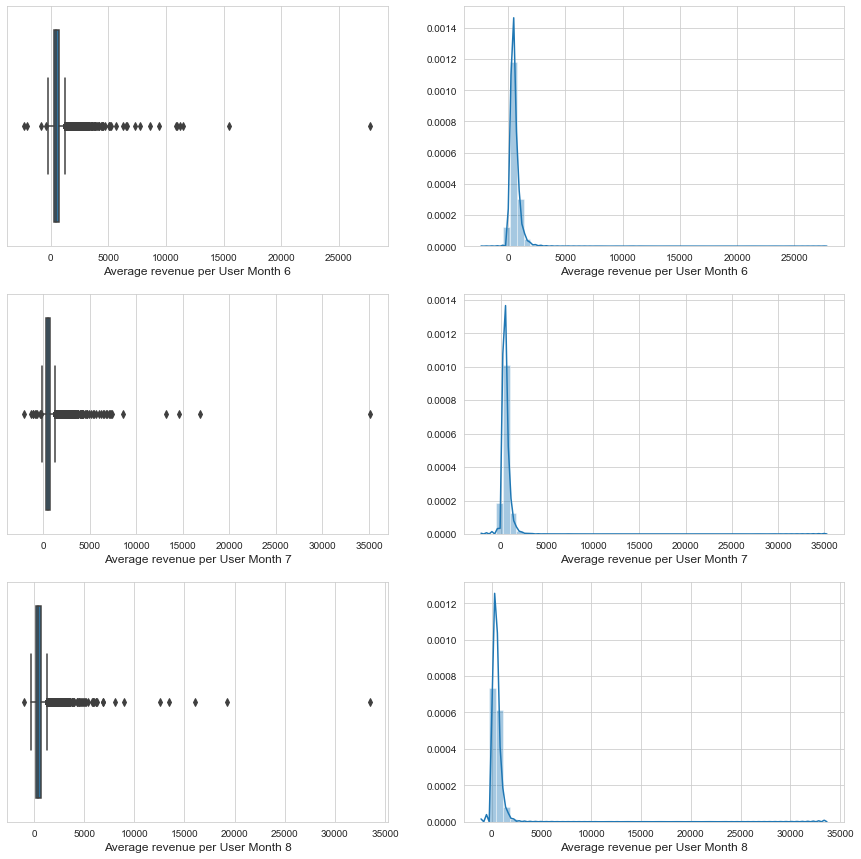

In [39]:
Create_BoxPlot_DistributionPlot('arpu', 'Average revenue per User')

In [40]:
# Print row count for values greater than 99th percentile
qntl_99_arpu_6 = hv_customers['arpu_6'].quantile(.99)
print('arpu_6 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['arpu_6'] > qntl_99_arpu_6].index)))

qntl_99_arpu_7 = hv_customers['arpu_7'].quantile(.99)
print('arpu_7 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['arpu_7'] > qntl_99_arpu_7].index)))

qntl_99_arpu_8 = hv_customers['arpu_8'].quantile(.99)
print('arpu_8 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['arpu_8'] > qntl_99_arpu_8].index)))

arpu_6 column having 300 datapoint greater than 99th percentile
arpu_7 column having 300 datapoint greater than 99th percentile
arpu_8 column having 300 datapoint greater than 99th percentile


we have 300 customer having `arpu_*` greater than 99th Percentile. Since every months are having same number of customer, these customer are not outlier. 

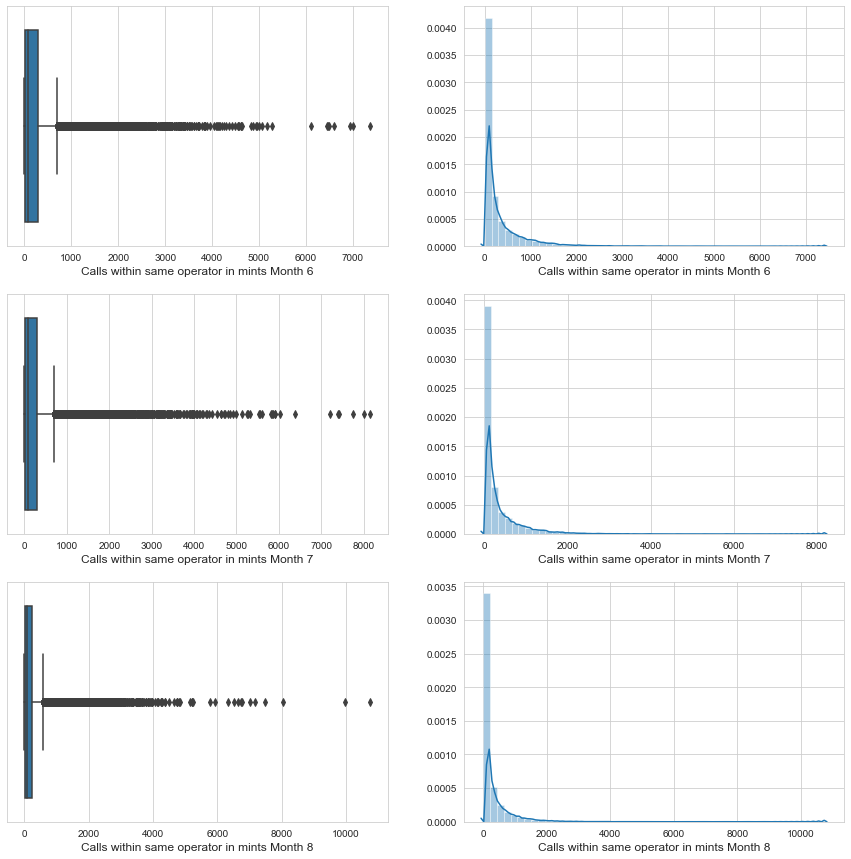

In [41]:
Create_BoxPlot_DistributionPlot('onnet_mou', 'Calls within same operator in mints')

In [42]:
# Print row count for values greater than 99th percentile
qntl_99_arpu_6 = hv_customers['onnet_mou_6'].quantile(.99)
print('onnet_mou_6 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['onnet_mou_6'] > qntl_99_arpu_6].index)))

qntl_99_arpu_7 = hv_customers['onnet_mou_7'].quantile(.99)
print('onnet_mou_7 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['onnet_mou_7'] > qntl_99_arpu_7].index)))

qntl_99_arpu_8 = hv_customers['onnet_mou_8'].quantile(.99)
print('onnet_mou_8 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['onnet_mou_8'] > qntl_99_arpu_8].index)))

onnet_mou_6 column having 300 datapoint greater than 99th percentile
onnet_mou_7 column having 300 datapoint greater than 99th percentile
onnet_mou_8 column having 300 datapoint greater than 99th percentile


we have 300 customer having `onnet_mou_*` greater than 99th Percentile. Since every months are having same number of customer, these customer are not outlier. 

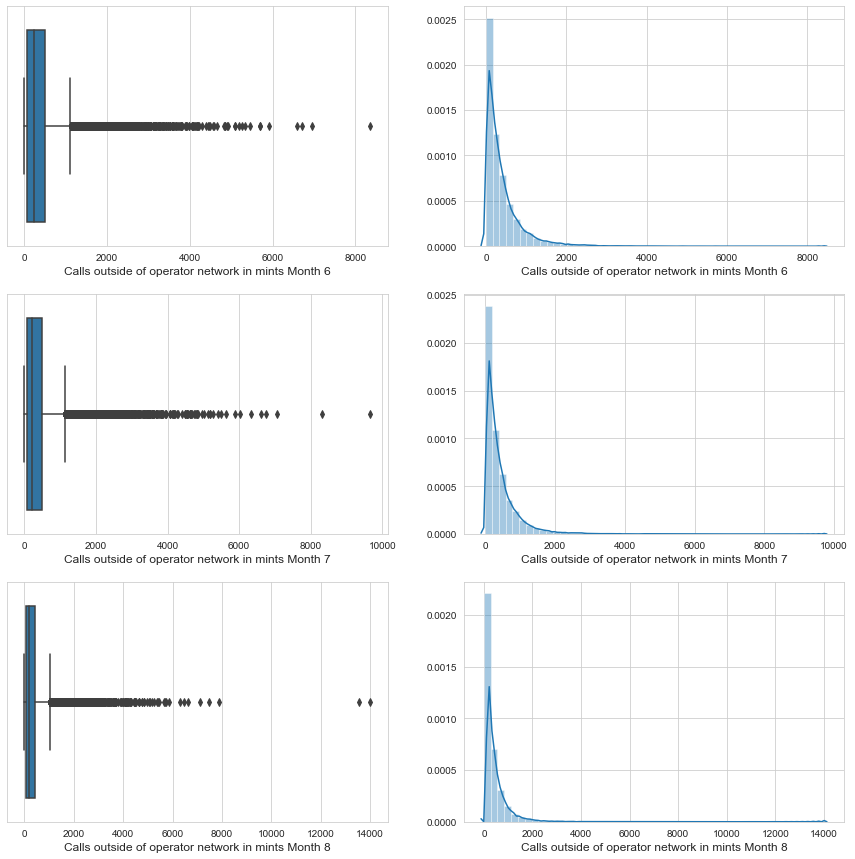

In [43]:
Create_BoxPlot_DistributionPlot('offnet_mou', 'Calls outside of operator network in mints')

In [44]:
# Print row count for values greater than 99th percentile
qntl_99_arpu_6 = hv_customers['offnet_mou_6'].quantile(.99)
print('offnet_mou_6 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['offnet_mou_6'] > qntl_99_arpu_6].index)))

qntl_99_arpu_7 = hv_customers['offnet_mou_7'].quantile(.99)
print('offnet_mou_7 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['offnet_mou_7'] > qntl_99_arpu_7].index)))

qntl_99_arpu_8 = hv_customers['offnet_mou_8'].quantile(.99)
print('offnet_mou_8 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['offnet_mou_8'] > qntl_99_arpu_8].index)))

offnet_mou_6 column having 300 datapoint greater than 99th percentile
offnet_mou_7 column having 300 datapoint greater than 99th percentile
offnet_mou_8 column having 300 datapoint greater than 99th percentile


we have 300 customer having `offnet_mou_*` greater than 99th Percentile. Since every months are having same number of customer, these customer are not outlier. 

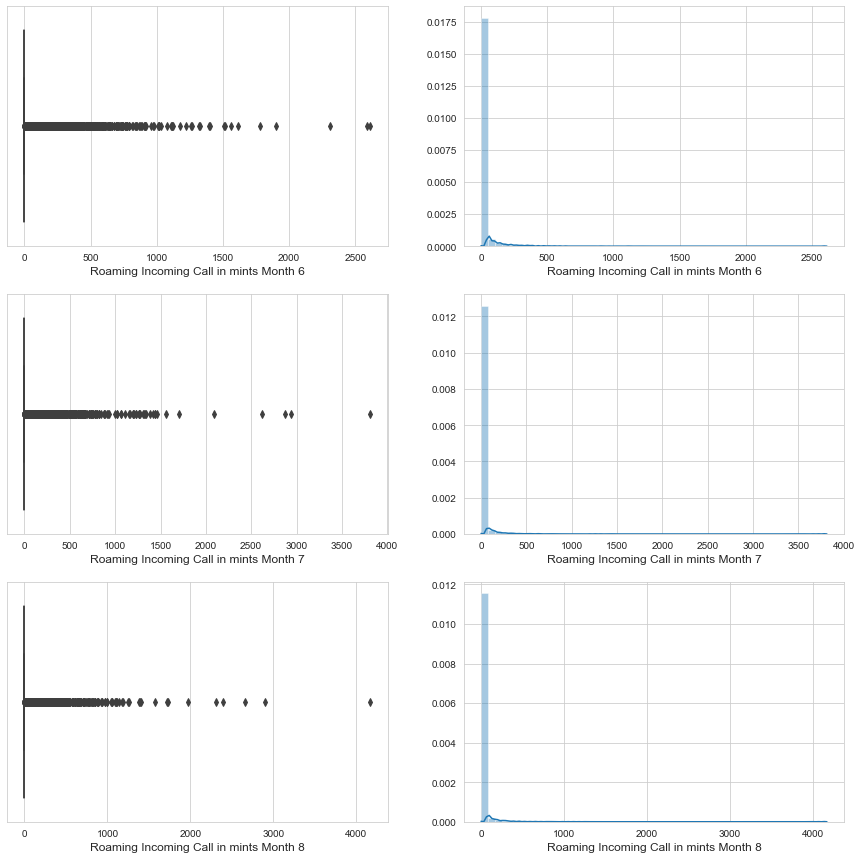

In [45]:
Create_BoxPlot_DistributionPlot('roam_ic_mou', 'Roaming Incoming Call in mints')

In [46]:
# Print row count for values greater than 99th percentile
qntl_99_6 = hv_customers['roam_ic_mou_6'].quantile(.99)
print('roam_ic_mou_6 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['roam_ic_mou_6'] > qntl_99_6].index)))

qntl_99_7 = hv_customers['roam_ic_mou_7'].quantile(.99)
print('roam_ic_mou_7 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['roam_ic_mou_7'] > qntl_99_7].index)))

qntl_99_8 = hv_customers['roam_ic_mou_8'].quantile(.99)
print('roam_ic_mou_8 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['roam_ic_mou_8'] > qntl_99_8].index)))

roam_ic_mou_6 column having 300 datapoint greater than 99th percentile
roam_ic_mou_7 column having 300 datapoint greater than 99th percentile
roam_ic_mou_8 column having 300 datapoint greater than 99th percentile


we have 300 customer having `roam_ic_mou_*` greater than 99th Percentile. Since every months are having same number of customer, these customer are not outlier. 

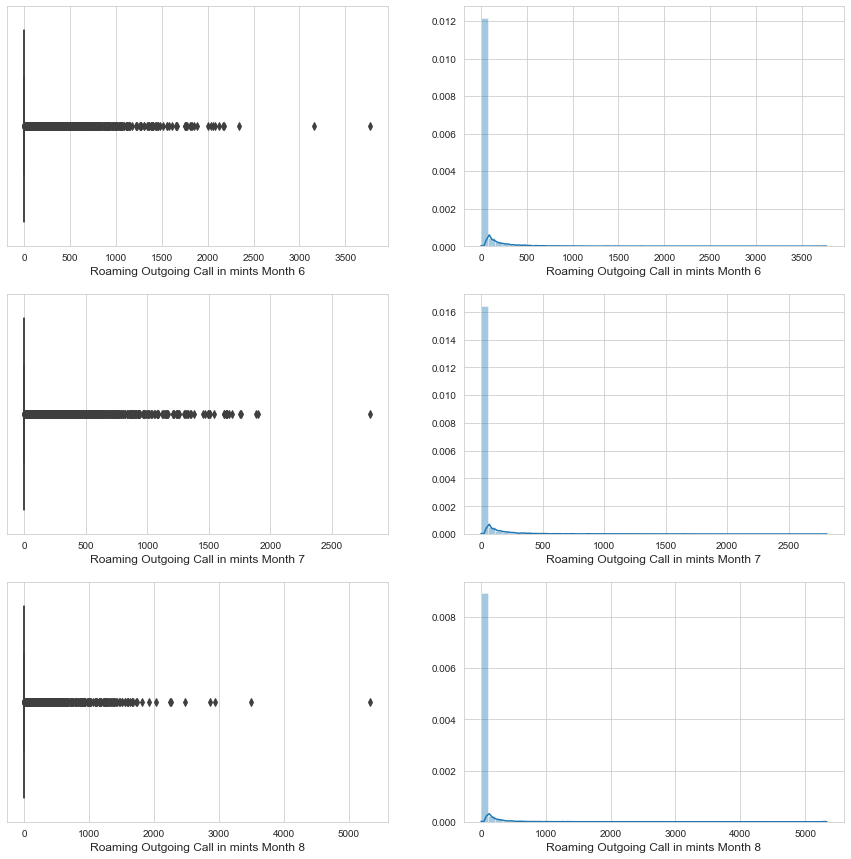

In [47]:
Create_BoxPlot_DistributionPlot('roam_og_mou', 'Roaming Outgoing Call in mints')

In [48]:
# Print row count for values greater than 99th percentile
qntl_99_6 = hv_customers['roam_og_mou_6'].quantile(.99)
print('roam_og_mou_6 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['roam_og_mou_6'] > qntl_99_6].index)))

qntl_99_7 = hv_customers['roam_og_mou_7'].quantile(.99)
print('roam_og_mou_7 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['roam_og_mou_7'] > qntl_99_7].index)))

qntl_99_8 = hv_customers['roam_og_mou_8'].quantile(.99)
print('roam_og_mou_8 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['roam_og_mou_8'] > qntl_99_8].index)))

roam_og_mou_6 column having 300 datapoint greater than 99th percentile
roam_og_mou_7 column having 300 datapoint greater than 99th percentile
roam_og_mou_8 column having 300 datapoint greater than 99th percentile


we have 300 customer having `roam_og_mou_*` greater than 99th Percentile. Since every months are having same number of customer, these customer are not outlier. 

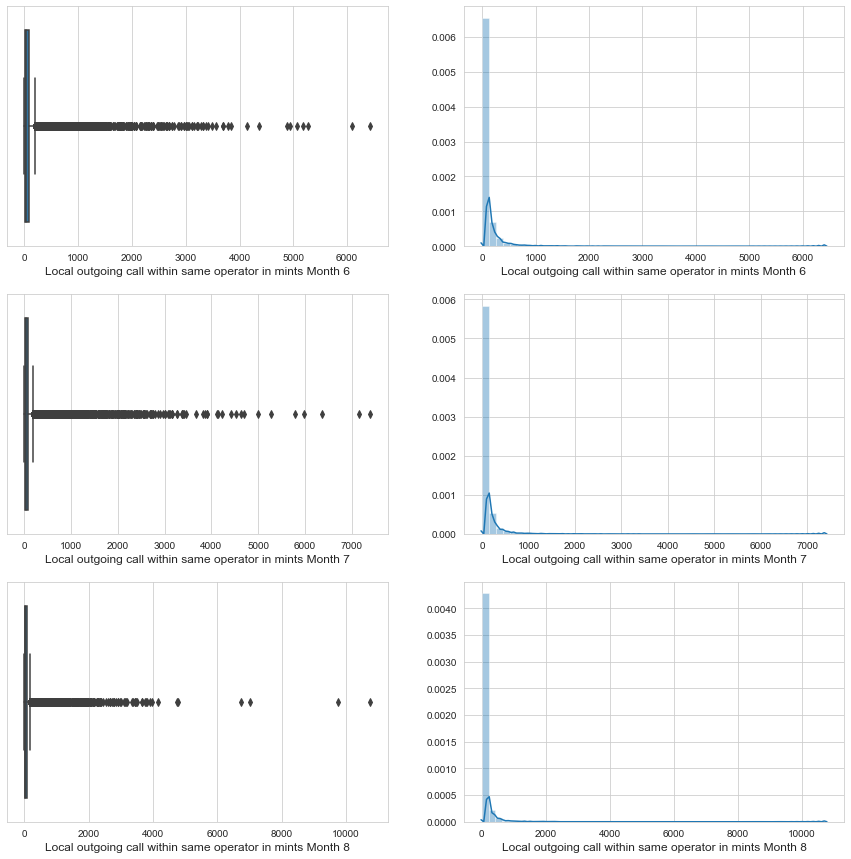

In [49]:
Create_BoxPlot_DistributionPlot('loc_og_t2t_mou', 'Local outgoing call within same operator in mints')

In [50]:
# Print row count for values greater than 99th percentile
qntl_99_6 = hv_customers['loc_og_t2t_mou_6'].quantile(.99)
print('loc_og_t2t_mou_6 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_t2t_mou_6'] > qntl_99_6].index)))

qntl_99_7 = hv_customers['loc_og_t2t_mou_7'].quantile(.99)
print('loc_og_t2t_mou_7 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_t2t_mou_7'] > qntl_99_7].index)))

qntl_99_8 = hv_customers['loc_og_t2t_mou_8'].quantile(.99)
print('loc_og_t2t_mou_8 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_t2t_mou_8'] > qntl_99_8].index)))

loc_og_t2t_mou_6 column having 300 datapoint greater than 99th percentile
loc_og_t2t_mou_7 column having 300 datapoint greater than 99th percentile
loc_og_t2t_mou_8 column having 300 datapoint greater than 99th percentile


we have 300 customer having `loc_og_t2t_mou_*` greater than 99th Percentile. Since every months are having same number of customer, these customer are not outlier. 

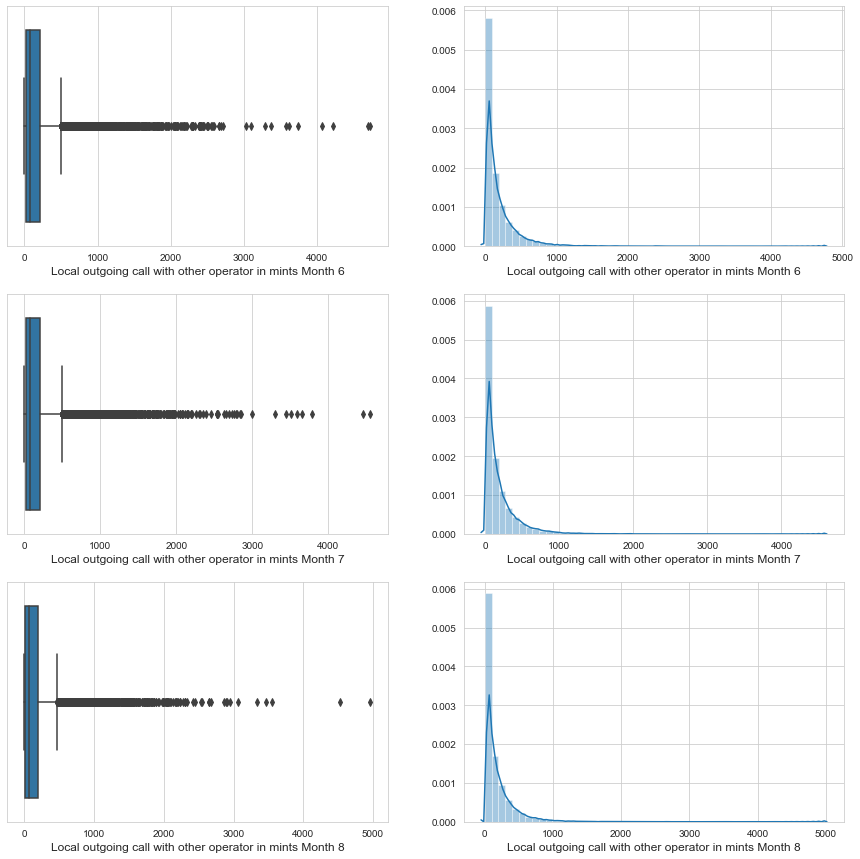

In [51]:
Create_BoxPlot_DistributionPlot('loc_og_t2m_mou', 'Local outgoing call with other operator in mints')

In [52]:
# Print row count for values greater than 99th percentile
qntl_99_6 = hv_customers['loc_og_t2m_mou_6'].quantile(.99)
print('loc_og_t2m_mou_6 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_t2m_mou_6'] > qntl_99_6].index)))

qntl_99_7 = hv_customers['loc_og_t2m_mou_7'].quantile(.99)
print('loc_og_t2m_mou_7 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_t2m_mou_7'] > qntl_99_7].index)))

qntl_99_8 = hv_customers['loc_og_t2m_mou_8'].quantile(.99)
print('loc_og_t2m_mou_8 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_t2m_mou_8'] > qntl_99_8].index)))

loc_og_t2m_mou_6 column having 300 datapoint greater than 99th percentile
loc_og_t2m_mou_7 column having 300 datapoint greater than 99th percentile
loc_og_t2m_mou_8 column having 300 datapoint greater than 99th percentile


we have 300 customer having `loc_og_t2m_mou_*` greater than 99th Percentile. Since every months are having same number of customer, these customer are not outlier. 

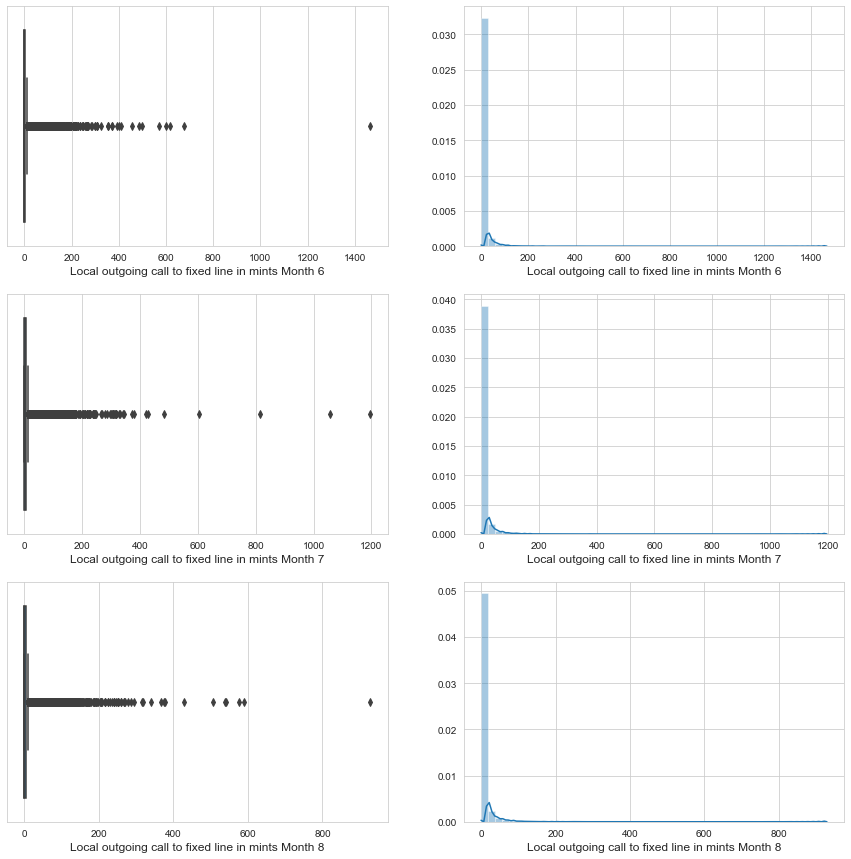

In [53]:
Create_BoxPlot_DistributionPlot('loc_og_t2f_mou', 'Local outgoing call to fixed line in mints')

In [54]:
# Print row count for values greater than 99th percentile
qntl_99_6 = hv_customers['loc_og_t2f_mou_6'].quantile(.99)
print('loc_og_t2f_mou_6 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_t2f_mou_6'] > qntl_99_6].index)))

qntl_99_7 = hv_customers['loc_og_t2f_mou_7'].quantile(.99)
print('loc_og_t2f_mou_7 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_t2f_mou_7'] > qntl_99_7].index)))

qntl_99_8 = hv_customers['loc_og_t2f_mou_8'].quantile(.99)
print('loc_og_t2f_mou_8 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_t2f_mou_8'] > qntl_99_8].index)))

loc_og_t2f_mou_6 column having 299 datapoint greater than 99th percentile
loc_og_t2f_mou_7 column having 300 datapoint greater than 99th percentile
loc_og_t2f_mou_8 column having 300 datapoint greater than 99th percentile


we have almost 300 customer having `loc_og_t2f_mou_*` greater than 99th Percentile. Since every months are having same number of customer, these customer are not outlier. 

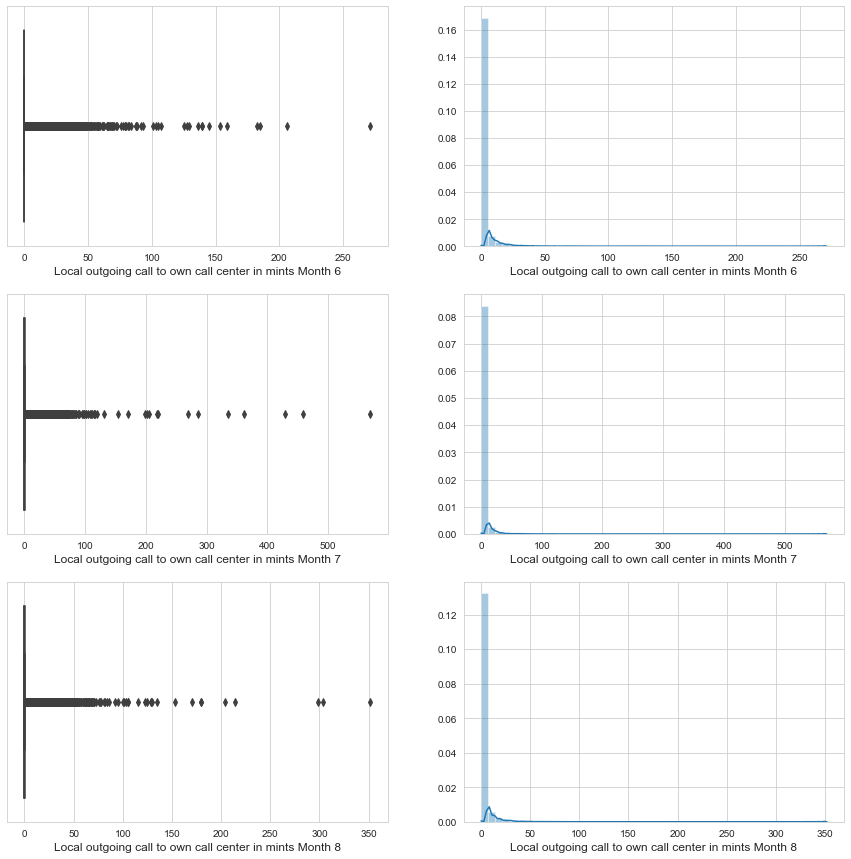

In [55]:
Create_BoxPlot_DistributionPlot('loc_og_t2c_mou', 'Local outgoing call to own call center in mints')

In [56]:
# Print row count for values greater than 99th percentile
qntl_99_6 = hv_customers['loc_og_t2c_mou_6'].quantile(.99)
print('loc_og_t2c_mou_6 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_t2c_mou_6'] > qntl_99_6].index)))

qntl_99_7 = hv_customers['loc_og_t2c_mou_7'].quantile(.99)
print('loc_og_t2c_mou_7 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_t2c_mou_7'] > qntl_99_7].index)))

qntl_99_8 = hv_customers['loc_og_t2c_mou_8'].quantile(.99)
print('loc_og_t2c_mou_8 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_t2c_mou_8'] > qntl_99_8].index)))

loc_og_t2c_mou_6 column having 299 datapoint greater than 99th percentile
loc_og_t2c_mou_7 column having 300 datapoint greater than 99th percentile
loc_og_t2c_mou_8 column having 299 datapoint greater than 99th percentile


we have almost 300 customer having `loc_og_t2c_mou_*` greater than 99th Percentile. Since every months are having same number of customer, these customer are not outlier. 

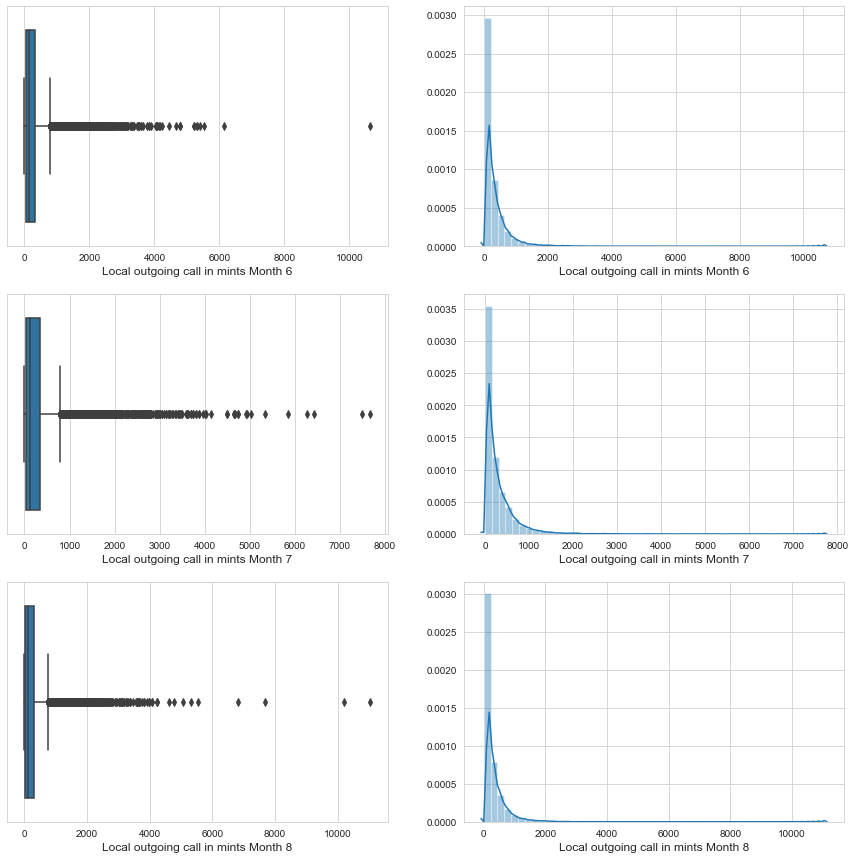

In [57]:
Create_BoxPlot_DistributionPlot('loc_og_mou', 'Local outgoing call in mints')

In [58]:
# Print row count for values greater than 99th percentile
qntl_99_6 = hv_customers['loc_og_mou_6'].quantile(.99)
print('loc_og_mou_6 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_mou_6'] > qntl_99_6].index)))

qntl_99_7 = hv_customers['loc_og_mou_7'].quantile(.99)
print('loc_og_mou_7 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_mou_7'] > qntl_99_7].index)))

qntl_99_8 = hv_customers['loc_og_mou_8'].quantile(.99)
print('loc_og_mou_8 column having {0} datapoint greater than 99th percentile'.format(len(hv_customers.loc[hv_customers['loc_og_mou_8'] > qntl_99_8].index)))

loc_og_mou_6 column having 300 datapoint greater than 99th percentile
loc_og_mou_7 column having 300 datapoint greater than 99th percentile
loc_og_mou_8 column having 300 datapoint greater than 99th percentile


we have 300 customer having `loc_og_mou_*` greater than 99th Percentile. Since every months are having same number of customer, these customer are not outlier. 

### Bivariate Analsysis

In [59]:
# Create Helper Function
def Create_distplot(column, Col_description):
    # Plot Box Plot and Distribution Plot
    plt.figure(figsize=(18, 5))
    sns.set_style('whitegrid')

    plt.subplot(1,3,1)
    sns.distplot(hv_customers[hv_customers['churn']==0][column+'_6'].dropna(),hist = False, label = "0", color = 'red')
    sns.distplot(hv_customers[hv_customers['churn']==1][column+'_6'].dropna(),hist = False, label = "1", color = 'green')
    plt.xlabel(Col_description + ' Month 6', size=12)
    plt.ylabel('')

    plt.subplot(1,3,2)
    sns.distplot(hv_customers[hv_customers['churn']==0][column+'_7'].dropna(),hist = False, label = "0", color = 'red')
    sns.distplot(hv_customers[hv_customers['churn']==1][column+'_7'].dropna(),hist = False, label = "1", color = 'green')
    plt.xlabel(Col_description + ' Month 7', size=12)
    plt.ylabel('')

    plt.subplot(1,3,3)
    sns.distplot(hv_customers[hv_customers['churn']==0][column+'_8'].dropna(),hist = False, label = "0", color = 'red')
    sns.distplot(hv_customers[hv_customers['churn']==1][column+'_8'].dropna(),hist = False, label = "1", color = 'green')
    plt.xlabel(Col_description + ' Month 8', size=12)
    plt.ylabel('')
    plt.show()

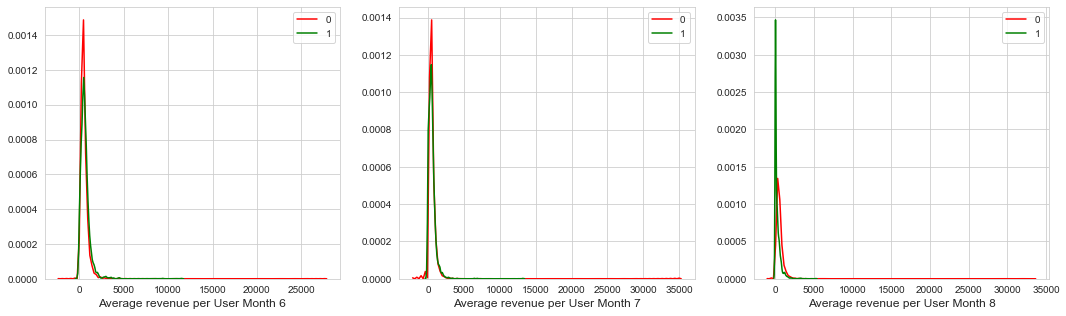

In [60]:
Create_distplot('arpu', 'Average revenue per User')

Distribution is widely spread for non-churners as conpare to churners and it is mostly separated to each other

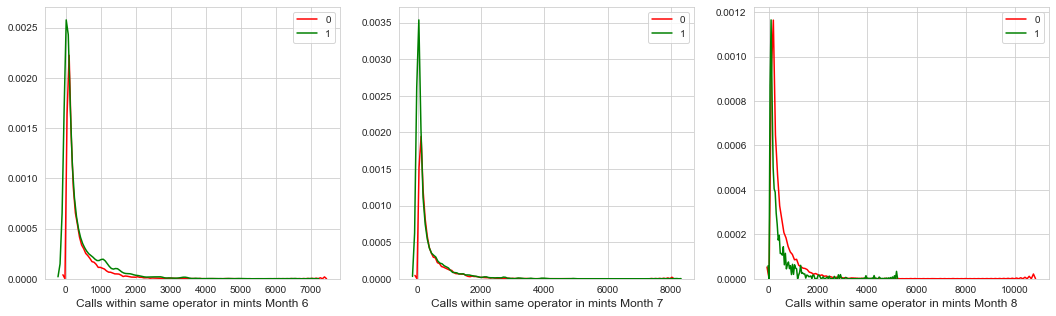

In [61]:
Create_distplot('onnet_mou', 'Calls within same operator in mints')

Distribution is widely spread for non-churners as conpare to churners and it is mostly separated to each other

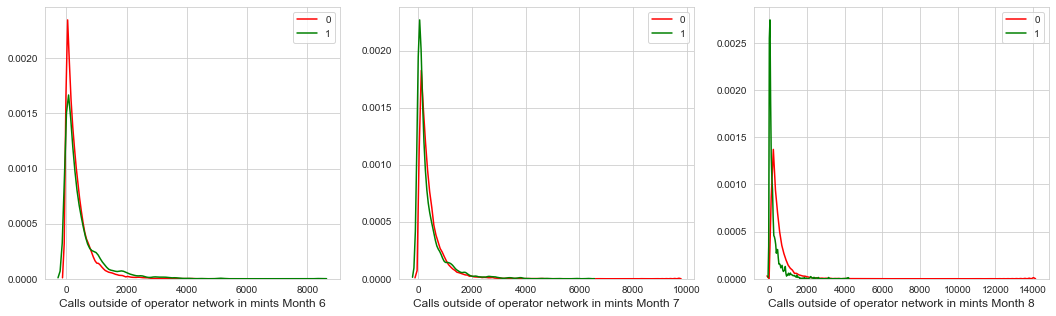

In [62]:
Create_distplot('offnet_mou', 'Calls outside of operator network in mints')

Distribution is widely spread for non-churners as conpare to churners and it is mostly separated to each other

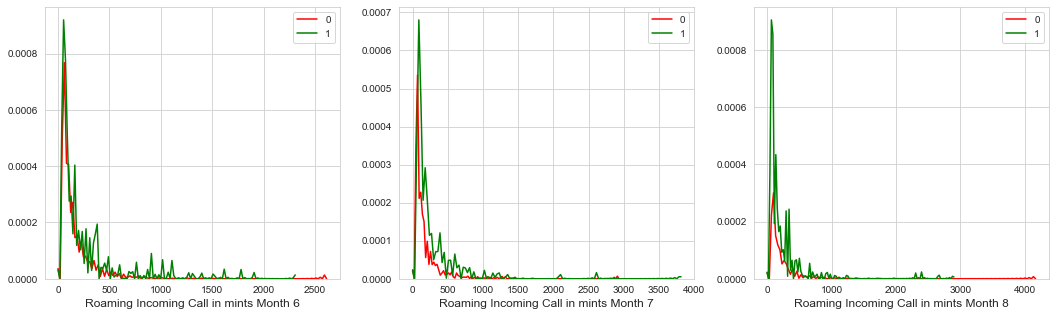

In [63]:
Create_distplot('roam_ic_mou', 'Roaming Incoming Call in mints')

Distribution is widely spread for non-churners as conpare to churners and it is mostly separated to each other

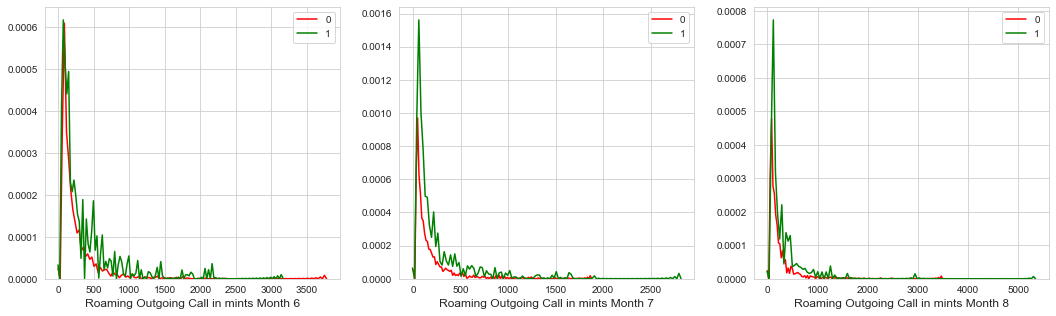

In [64]:
Create_distplot('roam_og_mou', 'Roaming Outgoing Call in mints')

Distribution is widely spread for non-churners as conpare to churners and it is mostly separated to each other

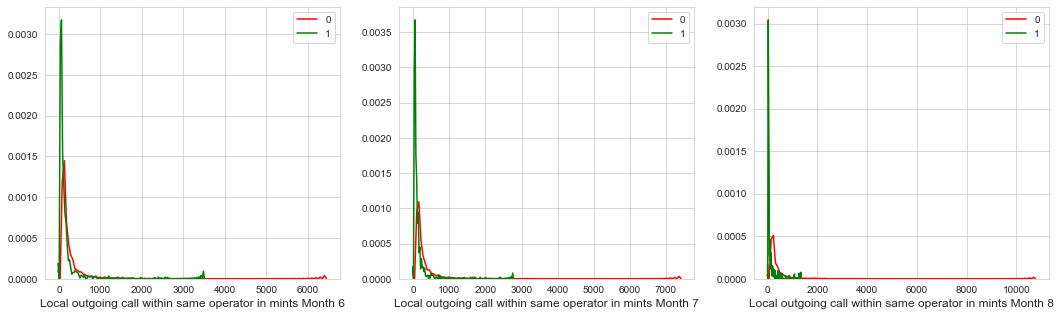

In [65]:
Create_distplot('loc_og_t2t_mou', 'Local outgoing call within same operator in mints')

Distribution is widely spread for non-churners as conpare to churners and it is mostly separated to each other

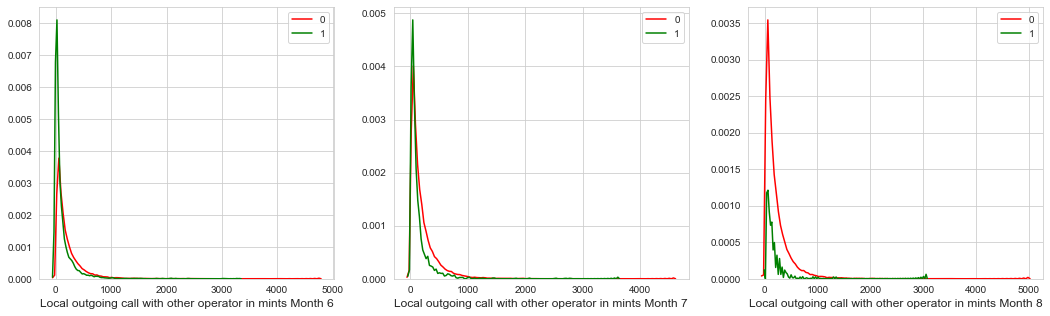

In [66]:
Create_distplot('loc_og_t2m_mou', 'Local outgoing call with other operator in mints')

Distribution is widely spread for non-churners as conpare to churners and it is mostly separated to each other

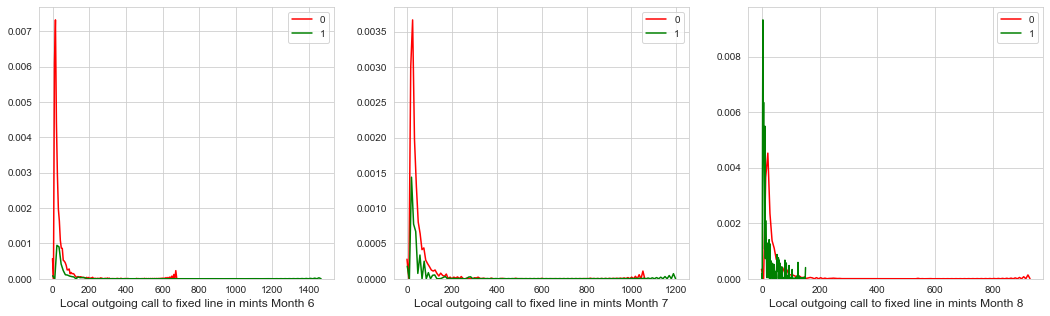

In [67]:
Create_distplot('loc_og_t2f_mou', 'Local outgoing call to fixed line in mints')

Distribution is widely spread for non-churners as conpare to churners and it is mostly separated to each other

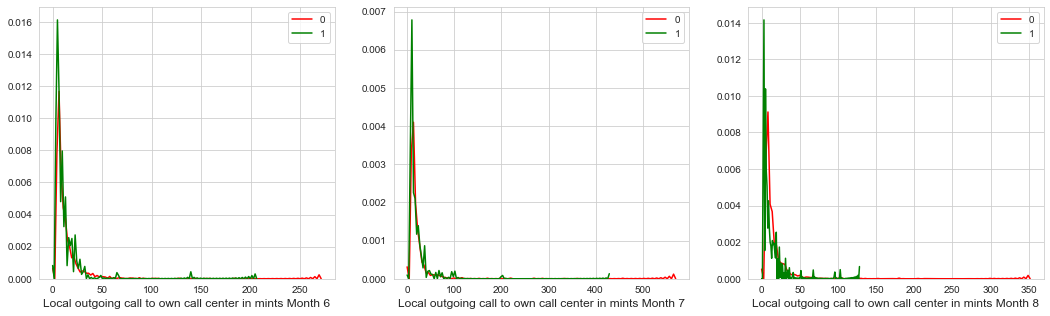

In [68]:
Create_distplot('loc_og_t2c_mou', 'Local outgoing call to own call center in mints')

Distribution is widely spread for non-churners as conpare to churners and it is mostly separated to each other

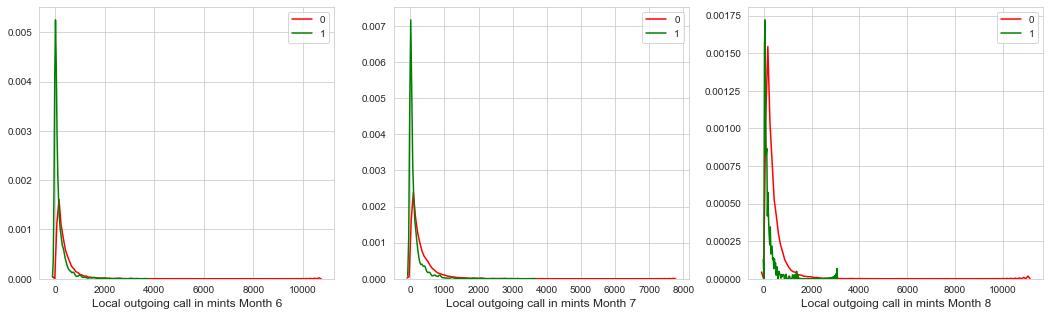

In [69]:
Create_distplot('loc_og_mou', 'Local outgoing call in mints')

Distribution is widely spread for non-churners as conpare to churners and it is mostly separated to each other

## Step 5: Model Building

### Interpretable Model  - Logistic Regression

In [70]:
# creating copy of the final hv_user dataframe
hv_customers_log = hv_customers.copy()

In [71]:
# Droping columns which are highly corelated to other columns as these are calculated form others
col_to_drop = ['vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'avg_rech_amt_6', 'avg_rech_amt_7',
               'avg_rech_amt_8', 'total_rech_num_data_6', 'total_rech_num_data_7', 'total_rech_num_data_8',
               'total_rech_amt_data_6', 'total_rech_amt_data_7','total_rech_amt_data_7', 'total_month_rech_6',
               'total_month_rech_7', 'total_month_rech_8']

hv_customers_log.drop(col_to_drop, axis =1, inplace=True)

In [72]:
#putting features variables in X
X_log = hv_customers_log.drop(['churn'], axis=1)

#putting response variables in Y
y_log = hv_customers_log['churn']

In [73]:
# Splitting the data into train and test
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, train_size=0.7,test_size=0.3,random_state=100)

In [74]:
X_train_log.shape

(20934, 153)

In [75]:
X_test_log.shape

(8972, 153)

In [76]:
# Keep mobile_number separately and drop it from test and train dataset
X_train_mobile_number = X_train_log['mobile_number']
X_test_mobile_number = X_test_log['mobile_number']
X_train_log = X_train_log.drop(['mobile_number'], axis=1)
X_test_log = X_test_log.drop(['mobile_number'], axis=1)

In [77]:
X_train_mobile_number.shape

(20934,)

In [78]:
X_test_mobile_number.shape

(8972,)

In [79]:
# Scale test and train dataset using standerd scaler
scaler = MinMaxScaler()
cols = X_train_log.columns
X_train_log[cols] = scaler.fit_transform(X_train_log[cols])
X_test_log[cols] = scaler.transform(X_test_log[cols])

In [80]:
# Creating model using all the columns
logm1 = sm.GLM(y_train_log,(sm.add_constant(X_train_log)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20790
Model Family:                Binomial   Df Model:                          143
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3595.7
Date:                Mon, 12 Oct 2020   Deviance:                       7191.5
Time:                        01:41:10   Pearson chi2:                 2.45e+07
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.9293      0.783     -2.463      0.014      -3.465      -0.394
arpu_6                    6.2430      7.151      0.873      0.383      -7.772      20.258
arpu_7                   10.2499      9.379      1.093      0.274      -8.133      28.632
arpu_8                   15.2712     11.607      1.316      0.188      -7.478      38.020
onnet_mou_6              10.9445     37.143      0.295      0.768     -61.855      83.744
onnet_mou_7             -35.7326     38.907     -0.918      0.358    -111.988      40.523
onnet_mou_8             -17.6199     72.169     -0.244      0.807    -159.068     123.829
offnet_mou_6             13.8631     41.655      0.333      0.739     -67.779      95.505
offnet_mou_7            -45.1856     46.170     -0.979      0.328    -135.676      45.305
offnet_mou_8            -46.3976     93.442     -0.497      0.620    -229.541     136.745
roam_ic_mou_6             2.8918      1.186      2.439      0.015       0.568       5.216
roam_ic_mou_7             1.7975      1.308      1.375      0.169      -0.766       4.361
roam_ic_mou_8            -2.4894      1.362     -1.828      0.068      -5.158       0.179
roam_og_mou_6            -4.9933     18.894     -0.264      0.792     -42.024      32.038
roam_og_mou_7            14.8718     13.528      1.099      0.272     -11.643      41.386
roam_og_mou_8            14.0230     35.755      0.392      0.695     -56.055      84.101
loc_og_t2t_mou_6      -2.116e+04   3.77e+04     -0.562      0.574    -9.5e+04    5.27e+04
loc_og_t2t_mou_7      -9713.1405   4.45e+04     -0.218      0.827   -9.69e+04    7.75e+04
loc_og_t2t_mou_8       3.796e+05   7.43e+04      5.110      0.000    2.34e+05    5.25e+05
loc_og_t2m_mou_6      -1.557e+04   2.77e+04     -0.562      0.574   -6.99e+04    3.87e+04
loc_og_t2m_mou_7      -5980.8085   2.74e+04     -0.218      0.827   -5.97e+04    4.77e+04
loc_og_t2m_mou_8       1.752e+05   3.43e+04      5.110      0.000    1.08e+05    2.42e+05
loc_og_t2f_mou_6      -2226.8265   3962.638     -0.562      0.574   -9993.455    5539.802
loc_og_t2f_mou_7      -1393.8469   6362.278     -0.219      0.827   -1.39e+04    1.11e+04
loc_og_t2f_mou_8       3.279e+04   6415.811      5.111      0.000    2.02e+04    4.54e+04
loc_og_t2c_mou_6         -4.0482      1.844     -2.196      0.028      -7.662      -0.434
loc_og_t2c_mou_7          3.4446      2.708      1.272      0.203      -1.862       8.751
loc_og_t2c_mou_8          2.4017      2.419      0.993      0.321      -2.340       7.143
loc_og_mou_6          -1.036e+04   7.77e+04     -0.133      0.894   -1.63e+05    1.42e+05
loc_og_mou_7          -3.454e+04   6.05e+04     -0.571      0.568   -1.53e+05     8.4e+04
loc_og_mou_8          -1.056e+05   1.01e+05     -1.046      0.295   -3.03e+05    9.22e+04
std_og_t2t_mou_6       

#### Feature selection using RFE

In [81]:
rfe = RFE(LogisticRegression(), 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train_log, y_train_log)
selected_columns = X_train_log.columns[rfe.support_]

In [82]:
# RFE selected columns
selected_columns

Index(['roam_og_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'count_rech_2g_8',
       'monthly_2g_8', 'sachet_2g_8', 'vbc_3g_8'],
      dtype='object')

In [83]:
logm = sm.GLM(y_train_log, sm.add_constant(X_train_log[selected_columns]), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20914
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3974.0
Date:                Mon, 12 Oct 2020   Deviance:                       7948.0
Time:                        01:41:47   Pearson chi2:                 6.72e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9485      0.065    -14.510      0.000      -1.077      -0.820
roam_og_mou_7          4.4919      0.628      7.155      0.000       3.261       5.722
loc_og_t2m_mou_8      -5.4686      3.031     -1.804      0.071     -11.410       0.473
loc_og_mou_8          40.6326     10.993      3.696      0.000      19.086      62.179
std_og_mou_6           1.1582      0.446      2.598      0.009       0.285       2.032
std_og_mou_8          52.4962     13.109      4.005      0.000      26.803      78.189
total_og_mou_8       -61.6899     13.039     -4.731      0.000     -87.247     -36.133
loc_ic_t2m_mou_8      -4.7921      5.575     -0.860      0.390     -15.719       6.135
loc_ic_mou_8         -18.8237      6.164     -3.054      0.002     -30.904      -6.743
total_ic_mou_6         7.8789      0.916      8.604      0.000       6.084       9.674
total_ic_mou_8       -17.3140      3.228     -5.363      0.000     -23.641     -10.987
total_rech_num_7       4.9968      0.568      8.801      0.000       3.884       6.110
total_rech_num_8     -12.0760      1.057    -11.426      0.000     -14.148     -10.004
total_rech_amt_6      17.2850      2.352      7.350      0.000      12.676      21.894
max_rech_amt_8         0.4825      1.144      0.422      0.673      -1.759       2.724
last_day_rch_amt_8   -15.0387      1.851     -8.125      0.000     -18.666     -11.411
total_rech_data_8    -26.3837      4.229     -6.238      0.000     -34.673     -18.095
count_rech_2g_8        2.9126      1.692      1.722      0.085      -0.403       6.228
monthly_2g_8          -6.9356      0.927     -7.486      0.000      -8.752      -5.120
sachet_2g_8            3.7007      1.687      2.194      0.028       0.395       7.006
vbc_3g_8             -12.2556      2.368     -5.175      0.000     -16.897      -7.614
======================================================================================
"""

In [84]:
# building model without max_rech_amt_8 variable. as it is having p value higher than 0.05
selected_columns = selected_columns.drop('max_rech_amt_8')
logm = sm.GLM(y_train_log, sm.add_constant(X_train_log[selected_columns]), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20915
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3974.1
Date:                Mon, 12 Oct 2020   Deviance:                       7948.2
Time:                        01:41:47   Pearson chi2:                 6.41e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9454      0.065    -14.546      0.000      -1.073      -0.818
roam_og_mou_7          4.5094      0.626      7.199      0.000       3.282       5.737
loc_og_t2m_mou_8      -5.4324      3.025     -1.796      0.072     -11.361       0.496
loc_og_mou_8          40.2124     10.901      3.689      0.000      18.846      61.579
std_og_mou_6           1.1391      0.444      2.568      0.010       0.270       2.008
std_og_mou_8          51.9653     12.990      4.000      0.000      26.505      77.426
total_og_mou_8       -61.0671     12.897     -4.735      0.000     -86.345     -35.790
loc_ic_t2m_mou_8      -4.8029      5.571     -0.862      0.389     -15.722       6.116
loc_ic_mou_8         -18.8600      6.157     -3.063      0.002     -30.928      -6.792
total_ic_mou_6         7.8547      0.914      8.597      0.000       6.064       9.645
total_ic_mou_8       -17.2030      3.211     -5.357      0.000     -23.497     -10.909
total_rech_num_7       4.9776      0.566      8.797      0.000       3.869       6.087
total_rech_num_8     -12.0841      1.056    -11.441      0.000     -14.154     -10.014
total_rech_amt_6      17.4847      2.308      7.575      0.000      12.960      22.009
last_day_rch_amt_8   -14.7781      1.755     -8.419      0.000     -18.218     -11.338
total_rech_data_8    -26.0564      4.145     -6.286      0.000     -34.181     -17.932
count_rech_2g_8        2.7982      1.666      1.680      0.093      -0.467       6.064
monthly_2g_8          -6.9172      0.925     -7.475      0.000      -8.731      -5.103
sachet_2g_8            3.5843      1.660      2.159      0.031       0.330       6.838
vbc_3g_8             -12.1708      2.358     -5.161      0.000     -16.793      -7.549
======================================================================================
"""

In [85]:
# building model without loc_ic_t2m_mou_8 variable. as it is having p value higher than 0.05
selected_columns = selected_columns.drop('loc_ic_t2m_mou_8')
logm = sm.GLM(y_train_log, sm.add_constant(X_train_log[selected_columns]), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20916
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3974.4
Date:                Mon, 12 Oct 2020   Deviance:                       7948.9
Time:                        01:41:47   Pearson chi2:                 5.40e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9464      0.065    -14.569      0.000      -1.074      -0.819
roam_og_mou_7          4.5287      0.626      7.236      0.000       3.302       5.755
loc_og_t2m_mou_8      -6.1510      2.860     -2.151      0.031     -11.756      -0.546
loc_og_mou_8          40.9163     10.792      3.791      0.000      19.764      62.069
std_og_mou_6           1.1397      0.443      2.570      0.010       0.271       2.009
std_og_mou_8          51.9674     12.955      4.011      0.000      26.576      77.359
total_og_mou_8       -61.0343     12.861     -4.746      0.000     -86.242     -35.827
loc_ic_mou_8         -22.9974      3.949     -5.823      0.000     -30.738     -15.257
total_ic_mou_6         7.8587      0.914      8.596      0.000       6.067       9.651
total_ic_mou_8       -17.1953      3.213     -5.352      0.000     -23.493     -10.898
total_rech_num_7       4.9747      0.566      8.793      0.000       3.866       6.084
total_rech_num_8     -12.1056      1.056    -11.465      0.000     -14.175     -10.036
total_rech_amt_6      17.5032      2.306      7.590      0.000      12.983      22.023
last_day_rch_amt_8   -14.7553      1.753     -8.417      0.000     -18.191     -11.320
total_rech_data_8    -26.0413      4.144     -6.284      0.000     -34.163     -17.919
count_rech_2g_8        2.7893      1.665      1.675      0.094      -0.475       6.053
monthly_2g_8          -6.9106      0.925     -7.469      0.000      -8.724      -5.097
sachet_2g_8            3.5746      1.660      2.154      0.031       0.322       6.827
vbc_3g_8             -12.1661      2.357     -5.161      0.000     -16.786      -7.546
======================================================================================
"""

In [86]:
# building model without count_rech_2g_8 variable. as it is having p value higher than 0.05
selected_columns = selected_columns.drop('count_rech_2g_8')
logm = sm.GLM(y_train_log, sm.add_constant(X_train_log[selected_columns]), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20916
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3974.4
Date:                Mon, 12 Oct 2020   Deviance:                       7948.9
Time:                        01:41:48   Pearson chi2:                 5.40e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9464      0.065    -14.569      0.000      -1.074      -0.819
roam_og_mou_7          4.5287      0.626      7.236      0.000       3.302       5.755
loc_og_t2m_mou_8      -6.1510      2.860     -2.151      0.031     -11.756      -0.546
loc_og_mou_8          40.9163     10.792      3.791      0.000      19.764      62.069
std_og_mou_6           1.1397      0.443      2.570      0.010       0.271       2.009
std_og_mou_8          51.9674     12.955      4.011      0.000      26.576      77.359
total_og_mou_8       -61.0343     12.861     -4.746      0.000     -86.242     -35.827
loc_ic_mou_8         -22.9974      3.949     -5.823      0.000     -30.738     -15.257
total_ic_mou_6         7.8587      0.914      8.596      0.000       6.067       9.651
total_ic_mou_8       -17.1953      3.213     -5.352      0.000     -23.493     -10.898
total_rech_num_7       4.9747      0.566      8.793      0.000       3.866       6.084
total_rech_num_8     -12.1056      1.056    -11.465      0.000     -14.175     -10.036
total_rech_amt_6      17.5032      2.306      7.590      0.000      12.983      22.023
last_day_rch_amt_8   -14.7553      1.753     -8.417      0.000     -18.191     -11.320
total_rech_data_8    -26.0413      4.144     -6.284      0.000     -34.163     -17.919
monthly_2g_8          -6.5937      0.961     -6.865      0.000      -8.476      -4.711
sachet_2g_8            6.3639      3.323      1.915      0.055      -0.150      12.877
vbc_3g_8             -12.1661      2.357     -5.161      0.000     -16.786      -7.546
======================================================================================
"""

In [87]:
# building model without sachet_2g_8 variable. as it is having p value higher than 0.05
selected_columns = selected_columns.drop('sachet_2g_8')
logm = sm.GLM(y_train_log, sm.add_constant(X_train_log[selected_columns]), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20917
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3976.4
Date:                Mon, 12 Oct 2020   Deviance:                       7952.7
Time:                        01:41:48   Pearson chi2:                 5.83e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9557      0.065    -14.704      0.000      -1.083      -0.828
roam_og_mou_7          4.5357      0.625      7.254      0.000       3.310       5.761
loc_og_t2m_mou_8      -6.1047      2.853     -2.140      0.032     -11.696      -0.514
loc_og_mou_8          40.6353     10.855      3.744      0.000      19.361      61.910
std_og_mou_6           1.1879      0.444      2.675      0.007       0.317       2.058
std_og_mou_8          51.5251     13.049      3.949      0.000      25.949      77.101
total_og_mou_8       -60.5378     12.957     -4.672      0.000     -85.933     -35.142
loc_ic_mou_8         -22.9045      3.948     -5.802      0.000     -30.642     -15.167
total_ic_mou_6         7.9214      0.913      8.679      0.000       6.132       9.710
total_ic_mou_8       -17.2665      3.213     -5.374      0.000     -23.563     -10.970
total_rech_num_7       5.0174      0.565      8.876      0.000       3.910       6.125
total_rech_num_8     -12.0743      1.055    -11.449      0.000     -14.141     -10.007
total_rech_amt_6      17.3663      2.338      7.427      0.000      12.783      21.949
last_day_rch_amt_8   -15.2172      1.765     -8.623      0.000     -18.676     -11.759
total_rech_data_8    -19.0227      1.749    -10.875      0.000     -22.451     -15.594
monthly_2g_8          -7.0379      0.929     -7.574      0.000      -8.859      -5.217
vbc_3g_8             -13.5069      2.279     -5.926      0.000     -17.974      -9.040
======================================================================================
"""

as we have all the features having p value is less than 0.05. Now lets check VIF

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_log[selected_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[selected_columns].values, i) for i in range(X_train_log[selected_columns].shape[1])]
vif['VIF'] = vif['VIF'].apply(lambda x:round(x, 2))
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_og_mou_8,344.09
4,std_og_mou_8,203.00
2,loc_og_mou_8,84.87
8,total_ic_mou_8,9.58
6,loc_ic_mou_8,8.34
10,total_rech_num_8,6.75
9,total_rech_num_7,5.54
1,loc_og_t2m_mou_8,3.82
11,total_rech_amt_6,3.81
7,total_ic_mou_6,3.44


VIF for total_og_mou_8 is more than 3. So we need to drop the variable and rebuild the modela again

In [89]:
# building model without total_og_mou_8 variable. as it is having VIF greater than 3
selected_columns = selected_columns.drop('total_og_mou_8')
logm = sm.GLM(y_train_log, sm.add_constant(X_train_log[selected_columns]), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20918
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3988.3
Date:                Mon, 12 Oct 2020   Deviance:                       7976.6
Time:                        01:41:48   Pearson chi2:                 5.38e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8823      0.064    -13.817      0.000      -1.008      -0.757
roam_og_mou_7          5.0217      0.620      8.096      0.000       3.806       6.237
loc_og_t2m_mou_8      -5.5947      2.834     -1.974      0.048     -11.149      -0.041
loc_og_mou_8          -6.8318      3.809     -1.794      0.073     -14.297       0.634
std_og_mou_6           1.7471      0.434      4.024      0.000       0.896       2.598
std_og_mou_8          -9.0193      1.380     -6.534      0.000     -11.725      -6.314
loc_ic_mou_8         -21.6778      4.002     -5.416      0.000     -29.522     -13.833
total_ic_mou_6         8.2501      0.879      9.387      0.000       6.528       9.973
total_ic_mou_8       -18.5672      3.284     -5.653      0.000     -25.004     -12.130
total_rech_num_7       4.9656      0.565      8.795      0.000       3.859       6.072
total_rech_num_8     -12.4142      1.054    -11.782      0.000     -14.479     -10.349
total_rech_amt_6      11.2036      2.142      5.229      0.000       7.005      15.403
last_day_rch_amt_8   -15.1299      1.827     -8.279      0.000     -18.712     -11.548
total_rech_data_8    -19.2049      1.749    -10.979      0.000     -22.633     -15.777
monthly_2g_8          -7.1263      0.933     -7.640      0.000      -8.955      -5.298
vbc_3g_8             -13.5494      2.292     -5.912      0.000     -18.041      -9.058
======================================================================================
"""

In [90]:
# building model without loc_og_mou_8 variable. as it is having p value higher than 0.05
selected_columns = selected_columns.drop('loc_og_mou_8')
logm = sm.GLM(y_train_log, sm.add_constant(X_train_log[selected_columns]), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20919
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3990.6
Date:                Mon, 12 Oct 2020   Deviance:                       7981.2
Time:                        01:41:48   Pearson chi2:                 6.70e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8827      0.064    -13.802      0.000      -1.008      -0.757
roam_og_mou_7          5.0525      0.620      8.151      0.000       3.838       6.267
loc_og_t2m_mou_8      -9.0830      2.068     -4.393      0.000     -13.135      -5.031
std_og_mou_6           1.7543      0.434      4.041      0.000       0.903       2.605
std_og_mou_8          -8.8795      1.375     -6.457      0.000     -11.575      -6.184
loc_ic_mou_8         -22.5707      3.980     -5.671      0.000     -30.371     -14.770
total_ic_mou_6         8.2692      0.879      9.411      0.000       6.547       9.991
total_ic_mou_8       -18.5321      3.285     -5.642      0.000     -24.970     -12.094
total_rech_num_7       5.0019      0.565      8.856      0.000       3.895       6.109
total_rech_num_8     -12.6031      1.050    -11.998      0.000     -14.662     -10.544
total_rech_amt_6      11.1463      2.155      5.172      0.000       6.922      15.370
last_day_rch_amt_8   -15.3248      1.831     -8.372      0.000     -18.913     -11.737
total_rech_data_8    -19.0806      1.748    -10.914      0.000     -22.507     -15.654
monthly_2g_8          -7.1145      0.933     -7.625      0.000      -8.943      -5.286
vbc_3g_8             -13.4794      2.291     -5.884      0.000     -17.969      -8.989
======================================================================================
"""

All the p vlaues are less than 0.05 lets check VIF again

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_log[selected_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[selected_columns].values, i) for i in range(X_train_log[selected_columns].shape[1])]
vif['VIF'] = vif['VIF'].apply(lambda x:round(x, 2))
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_ic_mou_8,9.56
4,loc_ic_mou_8,8.27
8,total_rech_num_8,6.67
7,total_rech_num_7,5.52
5,total_ic_mou_6,3.41
9,total_rech_amt_6,2.97
2,std_og_mou_6,2.47
3,std_og_mou_8,2.37
1,loc_og_t2m_mou_8,1.98
11,total_rech_data_8,1.61


In [92]:
# building model without total_ic_mou_8 variable. as it is having VIF greater than 3
selected_columns = selected_columns.drop('total_ic_mou_8')
logm = sm.GLM(y_train_log, sm.add_constant(X_train_log[selected_columns]), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20920
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4019.2
Date:                Mon, 12 Oct 2020   Deviance:                       8038.4
Time:                        01:41:49   Pearson chi2:                 9.38e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8584      0.063    -13.582      0.000      -0.982      -0.735
roam_og_mou_7          5.0141      0.616      8.145      0.000       3.808       6.221
loc_og_t2m_mou_8      -8.8482      2.077     -4.260      0.000     -12.920      -4.777
std_og_mou_6           1.8959      0.430      4.411      0.000       1.054       2.738
std_og_mou_8         -10.5868      1.387     -7.631      0.000     -13.306      -7.868
loc_ic_mou_8         -39.4263      2.516    -15.667      0.000     -44.359     -34.494
total_ic_mou_6         5.6180      0.741      7.587      0.000       4.167       7.069
total_rech_num_7       5.1091      0.564      9.052      0.000       4.003       6.215
total_rech_num_8     -13.2035      1.055    -12.513      0.000     -15.272     -11.135
total_rech_amt_6      11.3145      2.077      5.447      0.000       7.243      15.386
last_day_rch_amt_8   -16.1338      1.827     -8.831      0.000     -19.714     -12.553
total_rech_data_8    -19.1041      1.757    -10.875      0.000     -22.547     -15.661
monthly_2g_8          -7.0575      0.928     -7.606      0.000      -8.876      -5.239
vbc_3g_8             -14.1299      2.297     -6.151      0.000     -18.632      -9.628
======================================================================================
"""

All the p vlaues are less than 0.05 lets check VIF again

In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_log[selected_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[selected_columns].values, i) for i in range(X_train_log[selected_columns].shape[1])]
vif['VIF'] = vif['VIF'].apply(lambda x:round(x, 2))
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_rech_num_8,6.66
6,total_rech_num_7,5.51
4,loc_ic_mou_8,3.14
8,total_rech_amt_6,2.97
5,total_ic_mou_6,2.90
2,std_og_mou_6,2.47
3,std_og_mou_8,2.33
1,loc_og_t2m_mou_8,1.98
10,total_rech_data_8,1.61
9,last_day_rch_amt_8,1.55


In [94]:
# building model without total_rech_num_8 variable. as it is having VIF greater than 3
selected_columns = selected_columns.drop('total_rech_num_8')
logm = sm.GLM(y_train_log, sm.add_constant(X_train_log[selected_columns]), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20921
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4115.3
Date:                Mon, 12 Oct 2020   Deviance:                       8230.6
Time:                        01:41:50   Pearson chi2:                 2.00e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8748      0.062    -14.139      0.000      -0.996      -0.754
roam_og_mou_7          3.9584      0.608      6.506      0.000       2.766       5.151
loc_og_t2m_mou_8     -12.2459      2.173     -5.635      0.000     -16.505      -7.986
std_og_mou_6           2.5639      0.426      6.021      0.000       1.729       3.398
std_og_mou_8         -19.8541      1.327    -14.956      0.000     -22.456     -17.252
loc_ic_mou_8         -43.0029      2.593    -16.582      0.000     -48.086     -37.920
total_ic_mou_6         5.9922      0.729      8.220      0.000       4.563       7.421
total_rech_num_7       0.6922      0.431      1.605      0.109      -0.153       1.538
total_rech_amt_6       8.9052      2.026      4.396      0.000       4.934      12.876
last_day_rch_amt_8   -15.2867      1.849     -8.268      0.000     -18.910     -11.663
total_rech_data_8    -24.5356      1.694    -14.482      0.000     -27.856     -21.215
monthly_2g_8          -7.1878      0.931     -7.723      0.000      -9.012      -5.364
vbc_3g_8             -13.8134      2.277     -6.065      0.000     -18.277      -9.350
======================================================================================
"""

In [95]:
# building model without total_rech_num_7 variable. as it is having VIF greater than 3
selected_columns = selected_columns.drop('total_rech_num_7')
logm = sm.GLM(y_train_log, sm.add_constant(X_train_log[selected_columns]), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20922
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4116.6
Date:                Mon, 12 Oct 2020   Deviance:                       8233.1
Time:                        01:41:50   Pearson chi2:                 2.11e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8314      0.056    -14.941      0.000      -0.940      -0.722
roam_og_mou_7          4.0225      0.606      6.641      0.000       2.835       5.210
loc_og_t2m_mou_8     -12.1448      2.171     -5.594      0.000     -16.400      -7.890
std_og_mou_6           2.6116      0.425      6.140      0.000       1.778       3.445
std_og_mou_8         -19.3648      1.286    -15.056      0.000     -21.886     -16.844
loc_ic_mou_8         -42.8145      2.587    -16.548      0.000     -47.886     -37.743
total_ic_mou_6         6.0065      0.730      8.233      0.000       4.577       7.436
total_rech_amt_6       9.0734      2.034      4.461      0.000       5.087      13.060
last_day_rch_amt_8   -15.6828      1.836     -8.544      0.000     -19.281     -12.085
total_rech_data_8    -24.3879      1.695    -14.390      0.000     -27.710     -21.066
monthly_2g_8          -7.2326      0.930     -7.775      0.000      -9.056      -5.409
vbc_3g_8             -14.0089      2.279     -6.148      0.000     -18.475      -9.543
======================================================================================
"""

All the p vlaues are less than 0.05 lets check VIF again

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_log[selected_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[selected_columns].values, i) for i in range(X_train_log[selected_columns].shape[1])]
vif['VIF'] = vif['VIF'].apply(lambda x:round(x, 2))
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_mou_8,3.10
5,total_ic_mou_6,2.88
6,total_rech_amt_6,2.80
2,std_og_mou_6,2.40
1,loc_og_t2m_mou_8,1.91
3,std_og_mou_8,1.90
7,last_day_rch_amt_8,1.52
10,vbc_3g_8,1.26
8,total_rech_data_8,1.17
9,monthly_2g_8,1.15


In [97]:
# building model without loc_ic_mou_8 variable. as it is having VIF greater than 3
selected_columns = selected_columns.drop('loc_ic_mou_8')
logm = sm.GLM(y_train_log, sm.add_constant(X_train_log[selected_columns]), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20923
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4327.7
Date:                Mon, 12 Oct 2020   Deviance:                       8655.5
Time:                        01:41:50   Pearson chi2:                 6.00e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0132      0.055    -18.541      0.000      -1.120      -0.906
roam_og_mou_7          4.5038      0.597      7.549      0.000       3.335       5.673
loc_og_t2m_mou_8     -42.9523      2.286    -18.792      0.000     -47.432     -38.473
std_og_mou_6           3.5887      0.423      8.487      0.000       2.760       4.418
std_og_mou_8         -21.9976      1.298    -16.942      0.000     -24.542     -19.453
total_ic_mou_6         0.3965      0.643      0.617      0.537      -0.863       1.656
total_rech_amt_6      10.6017      2.021      5.246      0.000       6.641      14.562
last_day_rch_amt_8   -17.9287      1.892     -9.475      0.000     -21.637     -14.220
total_rech_data_8    -26.5009      1.709    -15.503      0.000     -29.851     -23.151
monthly_2g_8          -7.8081      0.928     -8.416      0.000      -9.626      -5.990
vbc_3g_8             -16.3909      2.351     -6.973      0.000     -20.998     -11.783
======================================================================================
"""

In [98]:
# building model without total_ic_mou_6 variable. as it is having p value higher than 0.05
selected_columns = selected_columns.drop('total_ic_mou_6')
logm = sm.GLM(y_train_log, sm.add_constant(X_train_log[selected_columns]), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20924
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4327.9
Date:                Mon, 12 Oct 2020   Deviance:                       8655.8
Time:                        01:41:50   Pearson chi2:                 5.15e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0054      0.053    -18.938      0.000      -1.109      -0.901
roam_og_mou_7          4.4795      0.595      7.526      0.000       3.313       5.646
loc_og_t2m_mou_8     -42.7030      2.246    -19.015      0.000     -47.105     -38.301
std_og_mou_6           3.5822      0.423      8.478      0.000       2.754       4.410
std_og_mou_8         -22.0537      1.296    -17.023      0.000     -24.593     -19.514
total_rech_amt_6      10.8043      1.987      5.437      0.000       6.909      14.699
last_day_rch_amt_8   -17.9467      1.891     -9.489      0.000     -21.653     -14.240
total_rech_data_8    -26.5284      1.709    -15.520      0.000     -29.879     -23.178
monthly_2g_8          -7.8040      0.928     -8.412      0.000      -9.622      -5.986
vbc_3g_8             -16.3843      2.350     -6.972      0.000     -20.990     -11.779
======================================================================================
"""

All the p vlaues are less than 0.05 lets check VIF again

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_log[selected_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[selected_columns].values, i) for i in range(X_train_log[selected_columns].shape[1])]
vif['VIF'] = vif['VIF'].apply(lambda x:round(x, 2))
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_rech_amt_6,2.58
2,std_og_mou_6,2.38
3,std_og_mou_8,1.89
5,last_day_rch_amt_8,1.51
1,loc_og_t2m_mou_8,1.49
8,vbc_3g_8,1.25
6,total_rech_data_8,1.16
7,monthly_2g_8,1.14
0,roam_og_mou_7,1.07


**All the feature are having p value less than 0.05 and VIF is less than 5. So we can consider this model as final model and use it for prediction**

In [100]:
logm = sm.GLM(y_train_log, sm.add_constant(X_train_log[selected_columns]), family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20924
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4327.9
Date:                Mon, 12 Oct 2020   Deviance:                       8655.8
Time:                        01:41:51   Pearson chi2:                 5.15e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0054      0.053    -18.938      0.000      -1.109      -0.901
roam_og_mou_7          4.4795      0.595      7.526      0.000       3.313       5.646
loc_og_t2m_mou_8     -42.7030      2.246    -19.015      0.000     -47.105     -38.301
std_og_mou_6           3.5822      0.423      8.478      0.000       2.754       4.410
std_og_mou_8         -22.0537      1.296    -17.023      0.000     -24.593     -19.514
total_rech_amt_6      10.8043      1.987      5.437      0.000       6.909      14.699
last_day_rch_amt_8   -17.9467      1.891     -9.489      0.000     -21.653     -14.240
total_rech_data_8    -26.5284      1.709    -15.520      0.000     -29.879     -23.178
monthly_2g_8          -7.8040      0.928     -8.412      0.000      -9.622      -5.986
vbc_3g_8             -16.3843      2.350     -6.972      0.000     -20.990     -11.779
======================================================================================
"""

In [101]:
selected_columns

Index(['roam_og_mou_7', 'loc_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_8',
       'total_rech_amt_6', 'last_day_rch_amt_8', 'total_rech_data_8',
       'monthly_2g_8', 'vbc_3g_8'],
      dtype='object')

### Model Evaluation and Prediction on Train Set

In [102]:
y_train_log_pred = res.predict(sm.add_constant(X_train_log[selected_columns])).values.reshape(-1)

Ceating DataFrame with actual target variable and the predicted probabilities

In [103]:
y_train_log_pred_final = pd.DataFrame({'Mobile_Number':X_train_mobile_number,
                                       'Churn':y_train_log.values,                                       
                                       'Churn_Probability':y_train_log_pred})
y_train_log_pred_final.head()

,Mobile_Number,Churn,Churn_Probability
21854,7000808628,0,0.219700
9520,7001981778,0,0.000122
21601,7000933636,0,0.010690
28165,7000507741,0,0.010592
10243,7001439596,0,0.235387


Creating new column `Predicted_Churn` with 1 if Converted Probability > 0.5 else 0 

In [104]:
y_train_log_pred_final['Predicted_Churn'] = y_train_log_pred_final.Churn_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_log_pred_final.head()

,Mobile_Number,Churn,Churn_Probability,Predicted_Churn
21854,7000808628,0,0.219700,0
9520,7001981778,0,0.000122,0
21601,7000933636,0,0.010690,0
28165,7000507741,0,0.010592,0
10243,7001439596,0,0.235387,0


In [105]:
# check the overall accuracy.
print('Overall Accuracy Score {0}'.format(metrics.accuracy_score(y_train_log_pred_final.Churn, y_train_log_pred_final.Predicted_Churn)*100))

Overall Accuracy Score 92.25661603133658


**Overall Accuracy of the model is 92%**

In [106]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_log_pred_final.Churn, y_train_log_pred_final.Predicted_Churn)
confusion

array([[19132,   102],
       [ 1519,   181]], dtype=int64)

In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Calculate sensitivity
print('Model Sensitivity {0}'.format(TP / float(TP+FN)))

Model Sensitivity 0.10647058823529412


**For our case study sensitivity is more importance as we should focus to capture the Churn when the customer is actually Churn**

In [109]:
# Calculate specificity
print('Model Specificity {0}'.format(TN / float(TN+FP)))

Model Specificity 0.994696890922325


In [110]:
# Calculate false postive rate
print('False Positive Rate {0}'.format(FP/ float(TN+FP)))

False Positive Rate 0.005303109077674951


In [111]:
# positive predictive value 
print('Positive Predicted Value {0}'.format(TP / float(TP+FP)))

Positive Predicted Value 0.6395759717314488


In [112]:
# Negative predictive value
print('Negative Predicted Value {0}'.format(TN / float(TN+ FN)))

Negative Predicted Value 0.9264442399883783


In [113]:
precision = precision_score(y_train_log_pred_final.Churn, y_train_log_pred_final.Predicted_Churn)
print('Precision Score {0}'.format(precision))

Precision Score 0.6395759717314488


In [114]:
recall = recall_score(y_train_log_pred_final.Churn, y_train_log_pred_final.Predicted_Churn)
print('Recall Score {0}'.format(recall))

Recall Score 0.10647058823529412


#### Ploting ROC Curve

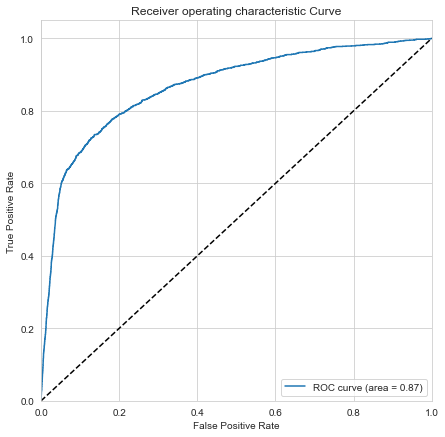

In [115]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_log_pred_final.Churn, y_train_log_pred_final.Churn_Probability, drop_intermediate = False)
auc_score = metrics.roc_auc_score(y_train_log_pred_final.Churn, y_train_log_pred_final.Churn_Probability)
plt.figure(figsize=(7,7))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

**From the ROC curve we get ROC curve area is 0.87. Our goal is to maximize TPR and minimize FPR.**

#### Finding Optimal Cutoff Point

In [116]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_log_pred_final[i]= y_train_log_pred_final.Churn_Probability.map(lambda x: 1 if x > i else 0)
    
y_train_log_pred_final.head()

,Mobile_Number,Churn,Churn_Probability,Predicted_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
21854,7000808628,0,0.219700,0,1,1,1,0,0,0,0,0,0,0
9520,7001981778,0,0.000122,0,1,0,0,0,0,0,0,0,0,0
21601,7000933636,0,0.010690,0,1,0,0,0,0,0,0,0,0,0
28165,7000507741,0,0.010592,0,1,0,0,0,0,0,0,0,0,0
10243,7001439596,0,0.235387,0,1,1,1,0,0,0,0,0,0,0


In [117]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['CutOff_Probability','Accuracy','Sensitivity','Specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_log_pred_final.Churn, y_train_log_pred_final[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
    
print(cutoff_df)

     CutOff_Probability  Accuracy  Sensitivity  Specificity
0.0                 0.0  0.081208     1.000000     0.000000
0.1                 0.1  0.790580     0.794118     0.790267
0.2                 0.2  0.891230     0.672353     0.910575
0.3                 0.3  0.925098     0.458824     0.966310
0.4                 0.4  0.924334     0.218824     0.986690
0.5                 0.5  0.922566     0.106471     0.994697
0.6                 0.6  0.920178     0.037647     0.998180
0.7                 0.7  0.919700     0.020588     0.999168
0.8                 0.8  0.919222     0.008824     0.999688
0.9                 0.9  0.919031     0.003529     0.999948


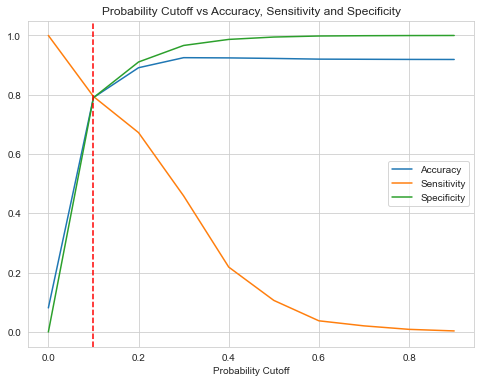

In [118]:
# Plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(8, 6))
plt.plot(cutoff_df['CutOff_Probability'], cutoff_df['Accuracy'], label='Accuracy')
plt.plot(cutoff_df['CutOff_Probability'], cutoff_df['Sensitivity'], label='Sensitivity')
plt.plot(cutoff_df['CutOff_Probability'], cutoff_df['Specificity'], label='Specificity')
plt.axvline(x=0.1, color='r', linestyle='--')
plt.xlabel('Probability Cutoff')
plt.title('Probability Cutoff vs Accuracy, Sensitivity and Specificity')
plt.legend()
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [119]:
# Assigne label based on optimul cutoff probability
y_train_log_pred_final['Final_Predicted_Churn'] = y_train_log_pred_final.Churn_Probability.map( lambda x: 1 if x > 0.1 else 0)
y_train_log_pred_final.head()

,Mobile_Number,Churn,Churn_Probability,Predicted_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted_Churn
21854,7000808628,0,0.219700,0,1,1,1,0,0,0,0,0,0,0,1
9520,7001981778,0,0.000122,0,1,0,0,0,0,0,0,0,0,0,0
21601,7000933636,0,0.010690,0,1,0,0,0,0,0,0,0,0,0,0
28165,7000507741,0,0.010592,0,1,0,0,0,0,0,0,0,0,0,0
10243,7001439596,0,0.235387,0,1,1,1,0,0,0,0,0,0,0,1


In [120]:
# check the overall accuracy.
print('Overall Accuracy Score {0}'.format(metrics.accuracy_score(y_train_log_pred_final.Churn, y_train_log_pred_final.Final_Predicted_Churn)*100))

Overall Accuracy Score 79.05799178370115


Overall Model Accuracy drops to 79% from 93%

In [121]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_log_pred_final.Churn, y_train_log_pred_final.Final_Predicted_Churn)
confusion

array([[15200,  4034],
       [  350,  1350]], dtype=int64)

In [122]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
# Calculate sensitivity
print('Model Sensitivity {0}'.format(TP / float(TP+FN)))

Model Sensitivity 0.7941176470588235


**Model Sensitivity increased from 15% to 79%**

In [124]:
# Calculate specificity
print('Model Specificity {0}'.format(TN / float(TN+FP)))

Model Specificity 0.7902672351045025


In [125]:
# Calculate false postive rate
print('False Positive Rate {0}'.format(FP/ float(TN+FP)))

False Positive Rate 0.20973276489549755


In [126]:
# positive predictive value 
print('Positive Predicted Value {0}'.format(TP / float(TP+FP)))

Positive Predicted Value 0.25074294205052006


In [127]:
# Negative predictive value
print('Negative Predicted Value {0}'.format(TN / float(TN+ FN)))

Negative Predicted Value 0.977491961414791


In [128]:
precision = precision_score(y_train_log_pred_final.Churn, y_train_log_pred_final.Final_Predicted_Churn)
print('Precision Score {0}'.format(precision))

Precision Score 0.25074294205052006


In [129]:
recall = recall_score(y_train_log_pred_final.Churn, y_train_log_pred_final.Final_Predicted_Churn)
print('Recall Score {0}'.format(recall))

Recall Score 0.7941176470588235


**We can see Recall increase significantly from 15% to 79%**

**For our business case we need to have a high recall model. As we need to detect customer who is actually churned. For that we may predict few customer as churned which is not actually churned. But that is completely fine.**

In [130]:
#f1 Score in Train Set
f1_train = f1_score(y_train_log_pred_final.Churn,y_train_log_pred_final.Final_Predicted_Churn)
print('f1 Score on Train Set {0}'.format(f1_train))

f1 Score on Train Set 0.3811405985319029


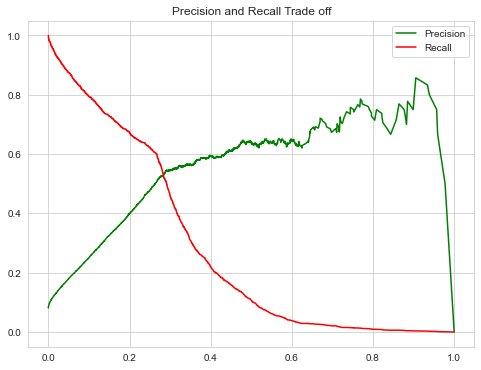

In [131]:
p, r, thresholds = precision_recall_curve(y_train_log_pred_final.Churn, y_train_log_pred_final.Churn_Probability)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, p[:-1], "g-", label='Precision')
plt.plot(thresholds, r[:-1], "r-", label='Recall')
plt.title('Precision and Recall Trade off')
plt.legend()
plt.show()

### Prediction on Test Set

In [132]:
feature_list = ['roam_og_mou_7', 'loc_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_8', 'total_rech_amt_6',
                'last_day_rch_amt_8', 'total_rech_data_8', 'monthly_2g_8', 'vbc_3g_8']

X_test_log = X_test_log[feature_list]
X_test_log.head()

,roam_og_mou_7,loc_og_t2m_mou_8,std_og_mou_6,std_og_mou_8,total_rech_amt_6,last_day_rch_amt_8,total_rech_data_8,monthly_2g_8,vbc_3g_8
4265,0.0,0.000133,0.051098,0.020777,0.011793,0.000000,0.033333,0.0,0.001378
29221,0.0,0.063009,0.006185,0.002016,0.016482,0.026073,0.000000,0.0,0.025451
974,0.0,0.002401,0.098019,0.072345,0.017107,0.011238,0.000000,0.0,0.000000
1602,0.0,0.000087,0.075476,0.138189,0.011253,0.029220,0.000000,0.0,0.000000
10225,0.0,0.047644,0.087838,0.045084,0.015516,0.029220,0.000000,0.0,0.000000


In [133]:
# Making Prediction on test set
y_test_log_pred = res.predict(sm.add_constant(X_test_log)).values.reshape(-1)

In [134]:
# Create DataFrame
y_test_log_pred_final = pd.DataFrame({'Mobile_Number':X_test_mobile_number,
                                       'Churn':y_test_log.values,                                       
                                       'Churn_Probability':y_test_log_pred})
y_test_log_pred_final.head()

,Mobile_Number,Churn,Churn_Probability
4265,7000116363,0,0.112475
29221,7002374208,0,0.011830
974,7000446909,0,0.085555
1602,7000083306,0,0.014933
10225,7001159367,0,0.016686


In [135]:
y_test_log_pred_final['Predicted_Churn'] = y_test_log_pred_final.Churn_Probability.map(lambda x: 1 if x > 0.105 else 0)
y_test_log_pred_final.head()

,Mobile_Number,Churn,Churn_Probability,Predicted_Churn
4265,7000116363,0,0.112475,1
29221,7002374208,0,0.011830,0
974,7000446909,0,0.085555,0
1602,7000083306,0,0.014933,0
10225,7001159367,0,0.016686,0


In [136]:
# check the overall accuracy.
print('Overall Accuracy Score {0}'.format(metrics.accuracy_score(y_test_log_pred_final.Churn, y_test_log_pred_final.Predicted_Churn)*100))

Overall Accuracy Score 80.36112349531876


In [137]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_test_log_pred_final.Churn, y_test_log_pred_final.Predicted_Churn)
confusion

array([[6657, 1597],
       [ 165,  553]], dtype=int64)

In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Calculate sensitivity
print('Model Sensitivity {0}'.format(TP / float(TP+FN)))

Model Sensitivity 0.7701949860724234


**For our case study Sensitivity is more important and Sensitivity on test set is 77% which is very close to Sensitivity on Train Set. That means our model is stable**

In [140]:
# Calculate specificity
print('Model Specificity {0}'.format(TN / float(TN+FP)))

Model Specificity 0.8065180518536467


In [141]:
# Calculate false postive rate
print('False Positive Rate {0}'.format(FP/ float(TN+FP)))

False Positive Rate 0.19348194814635328


In [142]:
# positive predictive value 
print('Positive Predicted Value {0}'.format(TP / float(TP+FP)))

Positive Predicted Value 0.25720930232558137


In [143]:
# Negative predictive value
print('Negative Predicted Value {0}'.format(TN / float(TN+ FN)))

Negative Predicted Value 0.9758135444151276


In [144]:
precision = precision_score(y_test_log_pred_final.Churn, y_test_log_pred_final.Predicted_Churn)
print('Precision Score {0}'.format(precision))

Precision Score 0.25720930232558137


In [145]:
recall = recall_score(y_test_log_pred_final.Churn, y_test_log_pred_final.Predicted_Churn)
print('Recall Score {0}'.format(recall))

Recall Score 0.7701949860724234


**Recall Score in train and test set is very close and our model is stable**

In [146]:
#f1 Score in Train Set
f1_train = f1_score(y_test_log_pred_final.Churn,y_test_log_pred_final.Predicted_Churn)
print('f1 Score on Train Set {0}'.format(f1_train))

f1 Score on Train Set 0.38563458856345884


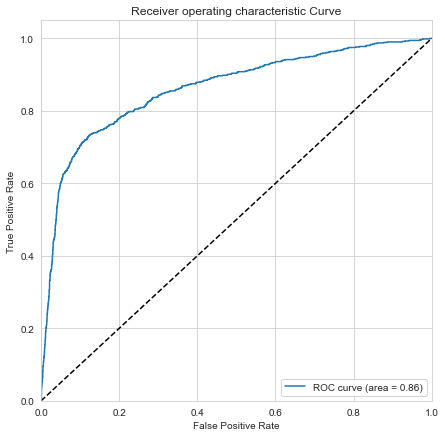

In [147]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_log_pred_final.Churn, y_test_log_pred_final.Churn_Probability, drop_intermediate = False)
auc_score = metrics.roc_auc_score(y_test_log_pred_final.Churn, y_test_log_pred_final.Churn_Probability)
plt.figure(figsize=(7,7))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

ROC score in test set is 0.86

<br>**Train Recall : 79.41%**  and  **Train Roc_auc_score : 87.00%**
<br>**Test Recall : 77.00%**  and  **Test Roc_auc_score : 86.00%**

### Non Interpretable Model

### Split dataset into Test set and Train set & Apply PCA

In [148]:
# creating copy of the final hv_user dataframe
hv_customers_PCA = hv_customers.copy()

In [149]:
#putting features variables in X
X = hv_customers_PCA.drop(['churn'], axis=1)

#putting response variables in Y
y = hv_customers_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Rescaling the feature before PCA

In [150]:
scaler = MinMaxScaler()

# fitting and transforming the scaler on train
cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])

# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

#### Handling Class Imbalance

In [151]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1700
Before OverSampling, counts of label '0': 19234 

Before OverSampling, churn event rate : 8.12% 



In [152]:
sm = SMOTE(random_state=12, sampling_strategy = 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [153]:
missing = 100 * (X_train.isnull().sum()/X_train.shape[0])
missing.loc[missing > 0]

Series([], dtype: float64)

In [154]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38468, 167)
After OverSampling, the shape of train_y: (38468,) 

After OverSampling, counts of label '1': 19234
After OverSampling, counts of label '0': 19234
After OverSampling, churn event rate : 50.0% 



In [155]:
# Applying PCA on training Data
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train_res)
pca.explained_variance_ratio_[:50]

array([0.49690133, 0.10971895, 0.08588675, 0.07537551, 0.03576134,
       0.02217858, 0.02072194, 0.01558333, 0.01497321, 0.01232558,
       0.01055133, 0.00814459, 0.00711561, 0.00574431, 0.00510971,
       0.0045684 , 0.00383534, 0.00350206, 0.00338044, 0.00321659,
       0.00309022, 0.00287414, 0.00276119, 0.00256552, 0.00240851,
       0.00226889, 0.00214931, 0.0019821 , 0.00195624, 0.00190075,
       0.00180584, 0.0015827 , 0.00150033, 0.00124674, 0.00122568,
       0.00120072, 0.00112091, 0.00102751, 0.00090769, 0.00088725,
       0.00082339, 0.000745  , 0.00071865, 0.00069539, 0.00068546,
       0.00066511, 0.00061488, 0.00059639, 0.00057227, 0.00056904])

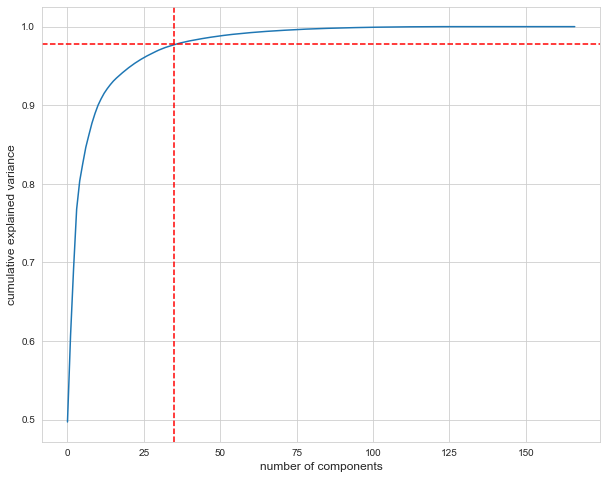

In [156]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components', size=12)
plt.ylabel('cumulative explained variance', size=12)
plt.axhline(y=0.978, color='r', linestyle='--')
plt.axvline(x=35, color='r', linestyle='--')
plt.show()

In [157]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
pca_final = IncrementalPCA(n_components=35)
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38468, 35)

In [158]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.015537624275755184 , min corr:  -0.014240337671616492


correlations are indeed close to 0

In [159]:
#Applying selected components to the test data
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 35)

#### Model Building

In [160]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [161]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [162]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [163]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [164]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

# Decision Tree

### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning

In [165]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7749
Recall/Sensitivity : 0.7852
AUC Score (Train): 0.842579
CV Score : Mean - 0.8346382 | Std - 0.004084319 | Min - 0.8272562 | Max - 0.8388099


In [166]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7416920503809076
Sensitivity/Recall : 0.7158774373259053
Specificity: 0.7675066634359099
False Positive Rate: 0.23249333656409013
Positive predictive value: 0.21126181668721744
Negative Predictive value: 0.9688025692001835
sklearn precision score value: 0.21126181668721744


In [167]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [168]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   20.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   39.7s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:   57.3s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [169]:
# printing the optimal accuracy score and hyperparameters
print('We are getiing a recall of',grid_search.best_score_,'using',grid_search.best_params_)

We are getiing a recall of 0.8021704772484007 using {'max_depth': 11, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [170]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=11,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [171]:
modelfit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8318
Recall/Sensitivity : 0.8463
AUC Score (Train): 0.912701
CV Score : Mean - 0.8872951 | Std - 0.004569134 | Min - 0.8796168 | Max - 0.8933572


In [172]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7457252092848711
Sensitivity/Recall : 0.6894150417827298
Specificity: 0.8020353767870123
False Positive Rate: 0.19796462321298763
Positive predictive value: 0.2325035227806482
Negative Predictive value: 0.9674119538214233
sklearn precision score value: 0.2325035227806482


In [173]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8254
           1       0.23      0.69      0.35       718

    accuracy                           0.79      8972
   macro avg       0.60      0.75      0.61      8972
weighted avg       0.91      0.79      0.83      8972



In [174]:
y_test

4265     0
29221    0
974      0
1602     0
10225    0
        ..
6262     0
1424     0
18308    0
22978    0
17728    0
Name: churn, Length: 8972, dtype: int64

In [175]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8317562649474888
Sensitivity/Recall : 0.8463138192783612
Specificity: 0.8171987106166164
False Positive Rate: 0.18280128938338358
Positive predictive value: 0.8223704152773568
Negative Predictive value: 0.8417050444468245
sklearn precision score value: 0.8223704152773568


,churn,churn_Prob,final_predicted
0,0,0.430000,0
1,0,0.001957,0
2,0,0.000000,0
3,0,0.531496,1
4,0,0.936641,1


     prob  accuracy     sensi     speci
0.0   0.0  0.593922  1.000000  0.187844
0.1   0.1  0.713788  0.989914  0.437662
0.2   0.2  0.776204  0.961163  0.591245
0.3   0.3  0.805189  0.931995  0.678382
0.4   0.4  0.827415  0.883955  0.770874
0.5   0.5  0.831756  0.846314  0.817199
0.6   0.6  0.826973  0.785120  0.868826
0.7   0.7  0.805657  0.695591  0.915722
0.8   0.8  0.774644  0.603619  0.945669
0.9   0.9  0.712618  0.452896  0.972341


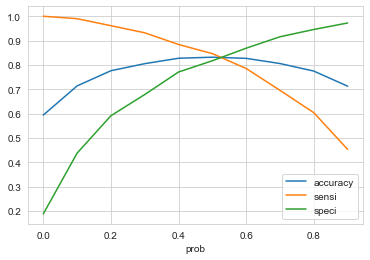

In [176]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [177]:
# predicting churn with cut-off 0.48
cut_off_prob=0.48
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8315223042528854
Sensitivity/Recall : 0.852500779868982
Specificity: 0.810543828636789
False Positive Rate: 0.18945617136321097
Positive predictive value: 0.8181727458709646
Negative Predictive value: 0.8460411352906062
sklearn precision score value: 0.8181727458709646


,churn,churn_Prob,final_predicted
0,0,0.430000,0
1,0,0.001957,0
2,0,0.000000,0
3,0,0.531496,1
4,0,0.936641,1


In [178]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7437562137510099
Sensitivity/Recall : 0.6908077994428969
Specificity: 0.7967046280591229
False Positive Rate: 0.20329537194087716
Positive predictive value: 0.2281508739650414
Negative Predictive value: 0.9673433362753752
sklearn precision score value: 0.2281508739650414


,churn,churn_Prob,final_predicted
4265,0,0.455224,0
29221,0,0.345070,0
974,0,0.740260,1
1602,0,0.300000,0
10225,0,0.157407,0


- Decision tree after selecting optimal cut-off also is resulting in a model with
<br>**Train Recall : 85.25%**  and  **Train Roc_auc_score : 83.15**
<br>**Test Recall : 60%**  and  **Test Roc_auc_score : 74.37**

Decision Tree seems overfitted to the data. 

# Random Forest

### Applying Random Forest Classifier on our principal components with Hyperparameter tuning

In [179]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

#### Depth Tunning

In [180]:
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters,return_train_score=True,
                    cv=5, 
                   scoring="f1")
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='f1')

In [181]:
scores = rfgs.cv_results_
print(scores)

print(scores["param_max_depth"])
print(scores["mean_train_score"])
print(scores["param_max_depth"])
print(scores["mean_test_score"])

{'mean_fit_time': array([10.36157055, 13.00607338, 13.84579196, 14.62529292]), 'std_fit_time': array([0.09197454, 0.14973247, 0.46377301, 0.66407076]), 'mean_score_time': array([0.09372063, 0.1218462 , 0.12497129, 0.12810583]), 'std_score_time': array([1.39719692e-02, 1.16901436e-02, 3.95975866e-06, 6.25676093e-03]), 'param_max_depth': masked_array(data=[10, 15, 20, 25],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 10}, {'max_depth': 15}, {'max_depth': 20}, {'max_depth': 25}], 'split0_test_score': array([0.89008731, 0.93967693, 0.95091093, 0.95101158]), 'split1_test_score': array([0.8891455 , 0.93422887, 0.943257  , 0.94383457]), 'split2_test_score': array([0.88520801, 0.93406175, 0.94460046, 0.94712644]), 'split3_test_score': array([0.88593891, 0.93404499, 0.94542679, 0.94622557]), 'split4_test_score': array([0.89057673, 0.93703091, 0.94630787, 0.94788065]), 'mean_test_score': array([0.88819129, 0.93580869, 

In [182]:
#plot_traintestAcc(rfgs.cv_results_,'max_depth')

In [183]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters, return_train_score=True,
                    cv=3, 
                   scoring="recall")

In [184]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='recall')

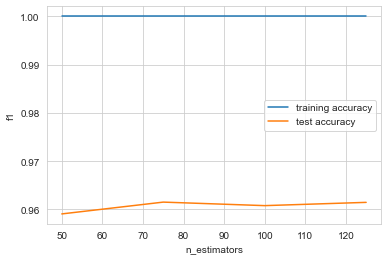

In [185]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

In [186]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters, return_train_score=True,
                    cv=5, 
                   scoring="f1")

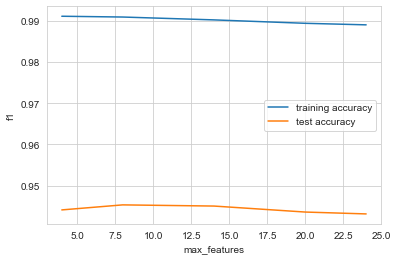

In [187]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'max_features')

In [188]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs = GridSearchCV(rf4, parameters, return_train_score=True,
                    cv=3, 
                   scoring="f1")

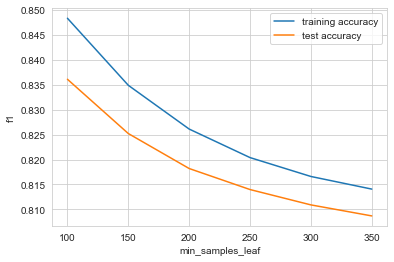

In [189]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_leaf')

In [190]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, return_train_score=True,
                    cv=3, 
                   scoring="f1")

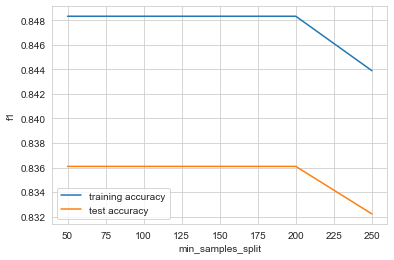

In [191]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_split')

In [192]:
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [193]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train_res)

Model performance on Train data:

Model Report
Accuracy : 0.86
Recall/Sensitivity : 0.8483
AUC Score (Train): 0.936159
CV Score : Mean - 0.9187237 | Std - 0.003757602 | Min - 0.9123066 | Max - 0.9236708


In [194]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [195]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.7967236953738308
Sensitivity/Recall : 0.7284122562674095
Specificity: 0.865035134480252
False Positive Rate: 0.134964865519748
Positive predictive value: 0.3194868662186927
Negative Predictive value: 0.9734151329243353
sklearn precision score value: 0.3194868662186927


In [196]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8599875220962878
Sensitivity/Recall : 0.8482894873661225
Specificity: 0.8716855568264531
False Positive Rate: 0.12831444317354684
Positive predictive value: 0.8686115843270868
Negative Predictive value: 0.8517577728104044
sklearn precision score value: 0.8686115843270868


,churn,churn_Prob,final_predicted
0,0,0.568558,1
1,0,0.070125,0
2,0,0.228331,0
3,0,0.247008,0
4,0,0.835639,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.561116  1.000000  0.122231
0.2   0.2  0.705937  0.994801  0.417074
0.3   0.3  0.806956  0.969325  0.644588
0.4   0.4  0.851071  0.915202  0.786940
0.5   0.5  0.859988  0.848289  0.871686
0.6   0.6  0.839295  0.751638  0.926952
0.7   0.7  0.793491  0.627067  0.959915
0.8   0.8  0.709395  0.434751  0.984039
0.9   0.9  0.583134  0.168712  0.997556


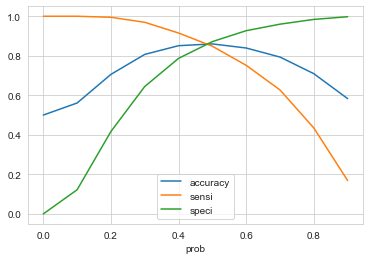

In [197]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [198]:
cut_off_prob=0.48
predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8604294478527608
Sensitivity/Recall : 0.8616512425912447
Specificity: 0.8592076531142768
False Positive Rate: 0.1407923468857232
Positive predictive value: 0.859550853171516
Negative Predictive value: 0.8613123469015479
sklearn precision score value: 0.859550853171516


,churn,churn_Prob,final_predicted
0,0,0.568558,1
1,0,0.070125,0
2,0,0.228331,0
3,0,0.247008,0
4,0,0.835639,1
...,...,...,...
38463,1,0.704985,1
38464,1,0.843498,1
38465,1,0.864192,1
38466,1,0.858969,1


In [199]:
y_test_df= predictChurnWithProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7967517057653485
Sensitivity/Recall : 0.7409470752089137
Specificity: 0.8525563363217834
False Positive Rate: 0.14744366367821662
Positive predictive value: 0.30417381360777584
Negative Predictive value: 0.9742489270386266
sklearn precision score value: 0.30417381360777584


,churn,churn_Prob,final_predicted
4265,0,0.456813,0
29221,0,0.332711,0
974,0,0.509286,1
1602,0,0.296046,0
10225,0,0.178288,0


- Random Forest after selecting optimal cut-off also is resulting in a model with
<br>**Train Recall : 86.16%**  and  **Train Roc_auc_score : 86.04**
<br>**Test Recall : 74%**  and  **Test Roc_auc_score : 79.67**

###  Boosting models

###### Gradiant boosting Classifier

######  we have applied  Gradiant boosting Classifier on our principal components with Hyperparameter tuning

In [200]:
#GBM algorithm
# Fitting the default GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8563
Recall/Sensitivity : 0.8597
AUC Score (Train): 0.926951
CV Score : Mean - 0.9191377 | Std - 0.003321438 | Min - 0.9144313 | Max - 0.9245219


In [201]:
# Hyperparameter tuning for n_estimators
param_test1 = {'n_estimators':range(20,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'n_estimators': range(20, 150, 10)}, scoring='f1')

In [202]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 140}, 0.9038332351795345)

In [203]:
# Hyperparameter tuning for max_depth and min_sample_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='f1')

In [204]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 15, 'min_samples_split': 200}, 0.9455175248833824)

In [205]:
# Hyperparameter tuning for min_sample_leaf
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15,min_samples_split=200, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch3.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  max_features='sqrt',
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'min_samples_leaf': range(30, 71, 10)}, scoring='f1')

In [206]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 30}, 0.9453821432372428)

In [207]:
# Hyperparameter tuning for max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15, min_samples_split=200, min_samples_leaf=30, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch4.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  min_samples_leaf=30,
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4, param_grid={'max_features': range(7, 20, 2)},
             scoring='f1')

In [208]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 17}, 0.9486007499837132)

In [209]:
# Tunned GradientBoostingClassifier
gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_features=15,max_depth=15, min_samples_split=200, min_samples_leaf=40, subsample=0.8, random_state=10)
modelfit(gbm_final, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9996
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9877853 | Std - 0.001355104 | Min - 0.9858777 | Max - 0.9897311


In [210]:
# predictions on Test data
dtest_predictions = gbm_final.predict(X_test_pca)

In [211]:
# model Performance on test data
getModelMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.7488984829166984
Sensitivity/Recall : 0.5612813370473537
Specificity: 0.9365156287860431
False Positive Rate: 0.06348437121395686
Positive predictive value: 0.43473570658036675
Negative Predictive value: 0.9608452454940957
sklearn precision score value: 0.43473570658036675


#### TO achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [212]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(gbm_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9996360611417282
Sensitivity/Recall : 1.0
Specificity: 0.9992721222834564
False Positive Rate: 0.0007278777165436207
Positive predictive value: 0.9992726517040732
Negative Predictive value: 1.0
sklearn precision score value: 0.9992726517040732


,churn,churn_Prob,final_predicted
0,0,0.115391,0
1,0,0.002332,0
2,0,0.016999,0
3,0,0.018663,0
4,0,0.280889,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.966700  1.000000  0.933399
0.2   0.2  0.990928  1.000000  0.981855
0.3   0.3  0.997348  1.000000  0.994697
0.4   0.4  0.999272  1.000000  0.998544
0.5   0.5  0.999636  1.000000  0.999272
0.6   0.6  0.999922  0.999948  0.999896
0.7   0.7  0.999740  0.999480  1.000000
0.8   0.8  0.998778  0.997556  1.000000
0.9   0.9  0.985806  0.971613  1.000000


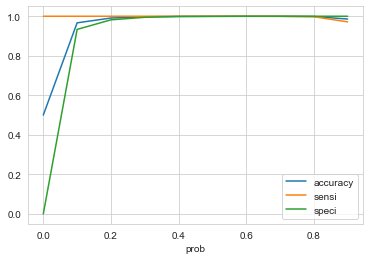

In [213]:
findOptimalCutoff(y_train_df)

In [214]:
cut_off_prob=0.1
predictChurnWithProb(gbm_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.9666995944681294
Sensitivity/Recall : 1.0
Specificity: 0.9333991889362587
False Positive Rate: 0.06660081106374129
Positive predictive value: 0.9375578844747745
Negative Predictive value: 1.0
sklearn precision score value: 0.9375578844747745


,churn,churn_Prob,final_predicted
0,0,0.115391,1
1,0,0.002332,0
2,0,0.016999,0
3,0,0.018663,0
4,0,0.280889,1
...,...,...,...
38463,1,0.987752,1
38464,1,0.987795,1
38465,1,0.972578,1
38466,1,0.995090,1


**Making prediction on test**

In [215]:
y_test_df= predictChurnWithProb(gbm_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.79934992268457
Sensitivity/Recall : 0.7771587743732591
Specificity: 0.8215410709958808
False Positive Rate: 0.17845892900411922
Positive predictive value: 0.27474150664697194
Negative Predictive value: 0.9769485664889785
sklearn precision score value: 0.27474150664697194


,churn,churn_Prob,final_predicted
4265,0,0.574154,1
29221,0,0.055143,0
974,0,0.297717,1
1602,0,0.028938,0
10225,0,0.009008,0


#### This model is litrally over-fitting the Training data with a lower performance on the Test data.

###### XGBoost Classifier

#####  we  have  applied XGBoost Classifier on our principal components with Hyperparameter tuning

In [216]:
# Create Model Instance
xgclf = xgb.XGBClassifier()

# Model fit and performance on Train data
modelfit(xgclf, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9829
Recall/Sensitivity : 0.9937
AUC Score (Train): 0.998354
CV Score : Mean - 0.9782791 | Std - 0.001495802 | Min - 0.9768965 | Max - 0.980844


In [217]:
# Hyperparameter tunning for the XGBClassifer 
# it takes long time

xgb_model = xgb.XGBClassifier()
parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth': [2, 4, 6, 8, 10],
              'min_child_weight': [3, 7, 11, 19, 25],
              'n_estimators': [50, 100, 150, 200, 300, 500]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)


gsearch1 = GridSearchCV(estimator = xgb_model,
                        param_grid = parameters,
                        n_jobs=-1,
                        cv=3,
                        scoring=scorer,
                        refit=True)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [218]:
gsearch1.best_params_, gsearch1.best_score_, gsearch1.best_estimator_

({'learning_rate': 0.1,
  'max_depth': 10,
  'min_child_weight': 3,
  'n_estimators': 500},
 0.9881906259326151,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=10,
               min_child_weight=3, missing=nan, monotone_constraints='()',
               n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None))

In [219]:
# Some more hyperparameter tunning for the XGBClassifer

xgb_model1 = xgb.XGBClassifier( learning_rate=0.1,
              n_estimators=500,
              max_depth=10,
              min_child_weight=3)
parameters1 = {'gamma': [0,0.1],
              'colsample_bytree': [1,0.9,0.8],
              'subsample': [0.8,0.9,1]}

gsearch2 = GridSearchCV(estimator =xgb_model1 ,
                        param_grid = parameters1,
                        scoring=scorer,
                        n_jobs=-1,
                        cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=10, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, valid

In [220]:
gsearch2.best_params_, gsearch2.best_score_, gsearch2.best_estimator_

({'colsample_bytree': 0.9, 'gamma': 0, 'subsample': 0.8},
 0.9884193259809942,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=10,
               min_child_weight=3, missing=nan, monotone_constraints='()',
               n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
               tree_method='exact', validate_parameters=1, verbosity=None))

In [221]:
final_model = xgb.XGBClassifier(learning_rate=0.1,
                                n_estimators=500,
                                max_depth=10,
                                min_child_weight=3,
                                gamma=0,
                                subsample=0.8,
                                colsample_bytree=1,
                                objective= 'binary:logistic')




final_model.fit(X_train_pca, y_train_res)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_res,
                                                              y_score=final_model.predict_proba(X_train_pca)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(X_test_pca)[:, 1]))

AUC on train data by XGBoost = 0.9999999999999999
AUC on test data by XGBoost = 0.8695593189222681


In [222]:
# Final Model
xgb2 = xgb.XGBClassifier(learning_rate=0.1,
                                n_estimators=500,
                                max_depth=10,
                                min_child_weight=3,
                                gamma=0,
                                subsample=0.8,
                                colsample_bytree=1,
                                objective= 'binary:logistic',
                                nthread=8,
                         scale_pos_weight=1,
                         seed=27)

In [223]:
# Fit Train data
modelfit(xgb2, X_train_pca, y_train_res)


Model Report
Accuracy : 1
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9904894 | Std - 0.001110071 | Min - 0.989206 | Max - 0.9921236


In [224]:
# Prediction on Test data
dtest_predictions = xgb2.predict(X_test_pca)

In [225]:
# Model evaluation on Test data
getModelMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.742904934081087
Sensitivity/Recall : 0.541782729805014
Specificity: 0.9440271383571601
False Positive Rate: 0.055972861642839836
Positive predictive value: 0.4571092831962397
Negative Predictive value: 0.9594877478143086
sklearn precision score value: 0.4571092831962397


#### To achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [226]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(xgb2,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 1.0
Sensitivity/Recall : 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive predictive value: 1.0
Negative Predictive value: 1.0
sklearn precision score value: 1.0


,churn,churn_Prob,final_predicted
0,0,0.022060,0
1,0,0.000024,0
2,0,0.009987,0
3,0,0.003202,0
4,0,0.064754,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.998986  1.000000  0.997972
0.2   0.2  0.999974  1.000000  0.999948
0.3   0.3  1.000000  1.000000  1.000000
0.4   0.4  1.000000  1.000000  1.000000
0.5   0.5  1.000000  1.000000  1.000000
0.6   0.6  1.000000  1.000000  1.000000
0.7   0.7  1.000000  1.000000  1.000000
0.8   0.8  1.000000  1.000000  1.000000
0.9   0.9  0.999948  0.999896  1.000000


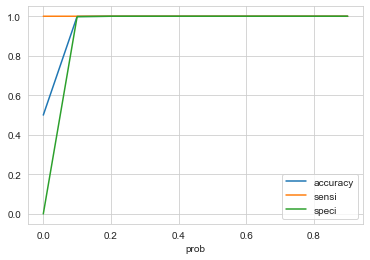

In [227]:
# Finding optimal cut-off probability
findOptimalCutoff(y_train_df)

In [228]:
# Selecting 0.09 as cut-off in an attempt to improve recall rate
cut_off_prob=0.09
predictChurnWithProb(xgb2,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.998180305708641
Sensitivity/Recall : 1.0
Specificity: 0.9963606114172819
False Positive Rate: 0.0036393885827181033
Positive predictive value: 0.9963738085370908
Negative Predictive value: 1.0
sklearn precision score value: 0.9963738085370908


,churn,churn_Prob,final_predicted
0,0,0.022060,0
1,0,0.000024,0
2,0,0.009987,0
3,0,0.003202,0
4,0,0.064754,0
...,...,...,...
38463,1,0.998425,1
38464,1,0.993735,1
38465,1,0.994231,1
38466,1,0.999332,1


**Making prediction on test set**

In [229]:
y_test_df= predictChurnWithProb(xgb2,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.79684484875401
Sensitivity/Recall : 0.7284122562674095
Specificity: 0.8652774412406106
False Positive Rate: 0.13472255875938938
Positive predictive value: 0.3198776758409786
Negative Predictive value: 0.9734223797192313
sklearn precision score value: 0.3198776758409786


,churn,churn_Prob,final_predicted
4265,0,0.911114,1
29221,0,0.017404,0
974,0,0.036891,0
1602,0,0.012804,0
10225,0,0.001138,0


## Final Model Selection

Since Business objective for this project is to identify churn. Hence Recall will be most important parameter to select final model

| Model/Metrics                            | Train   | Test   |
|------------------------------------------|---------|--------|
| **Logistic Regression ( cut-off = 0.10)**|         |        |
| Roc_auc_score                            | 87.00%  | 86.00% |
| Sensitivity/Recall                       | 79.41%  | 77.01% |
| Specificity                              | 79.02%  | 80.65% |
| precision                                | 25.07%  | 25.72% |
| **DecisionTree ( cut-off = 0.48)**       |         |        |
| Roc_auc_score                            | 83.15%  | 74.37% |
| Sensitivity/Recall                       | 85.25%  | 69.08% |
| Specificity                              | 81.05%  | 79.67% |
| precision                                | 81.81%  | 22.81% |
| **Random Forest (cut-off = 0.48)**       |         |        |
| Roc_auc_score                            | 86.04%  | 79.67% |
| Sensitivity/Recall                       | 86.16%  | 74.09% |
| Specificity                              | 85.92%  | 85.25% |
| precision                                | 85.95%  | 30.41% |
| **GBC (cut-off = 0.1**                   |         |        |
| Roc_auc_score                            | 96.66%  | 80.84% |
| Sensitivity/Recall                       | 100.00% | 79.87% |
| Specificity                              | 93.33%  | 81.81% |
| precision                                | 93.75%  | 27.47% |
| **XGB (cut-off = 0.09)**                 |         |        |
| Roc_auc_score                            | 99.81%  | 79.68% |
| Sensitivity/Recall                       | 100.00% | 72.84% |
| Specificity                              | 99.63%  | 86.52% |
| precision                                | 99.63%  | 31.98% |

Ovarall, **Logistic regression** perform best among all the models. It is having Test Recall as 77% which is very close to train model. Hence it is not overfitted. Althogh precission is very low for this case but that should not be a problem as we are trying to achieve high recall rate.

## Identifying relevant churn features. 

We will use an instance of Random Forest classifier to identify the features most relevant to churn. 

### Random Forest for churn driver features 

In [230]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)

In [231]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 17.7min
[Parallel(n_jobs=4)]: Done 324 out of 324 | elapsed: 31.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [12, 15, 20],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [232]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8901426275696837 using {'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [233]:
rf = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10)

In [234]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=10)

<AxesSubplot:>

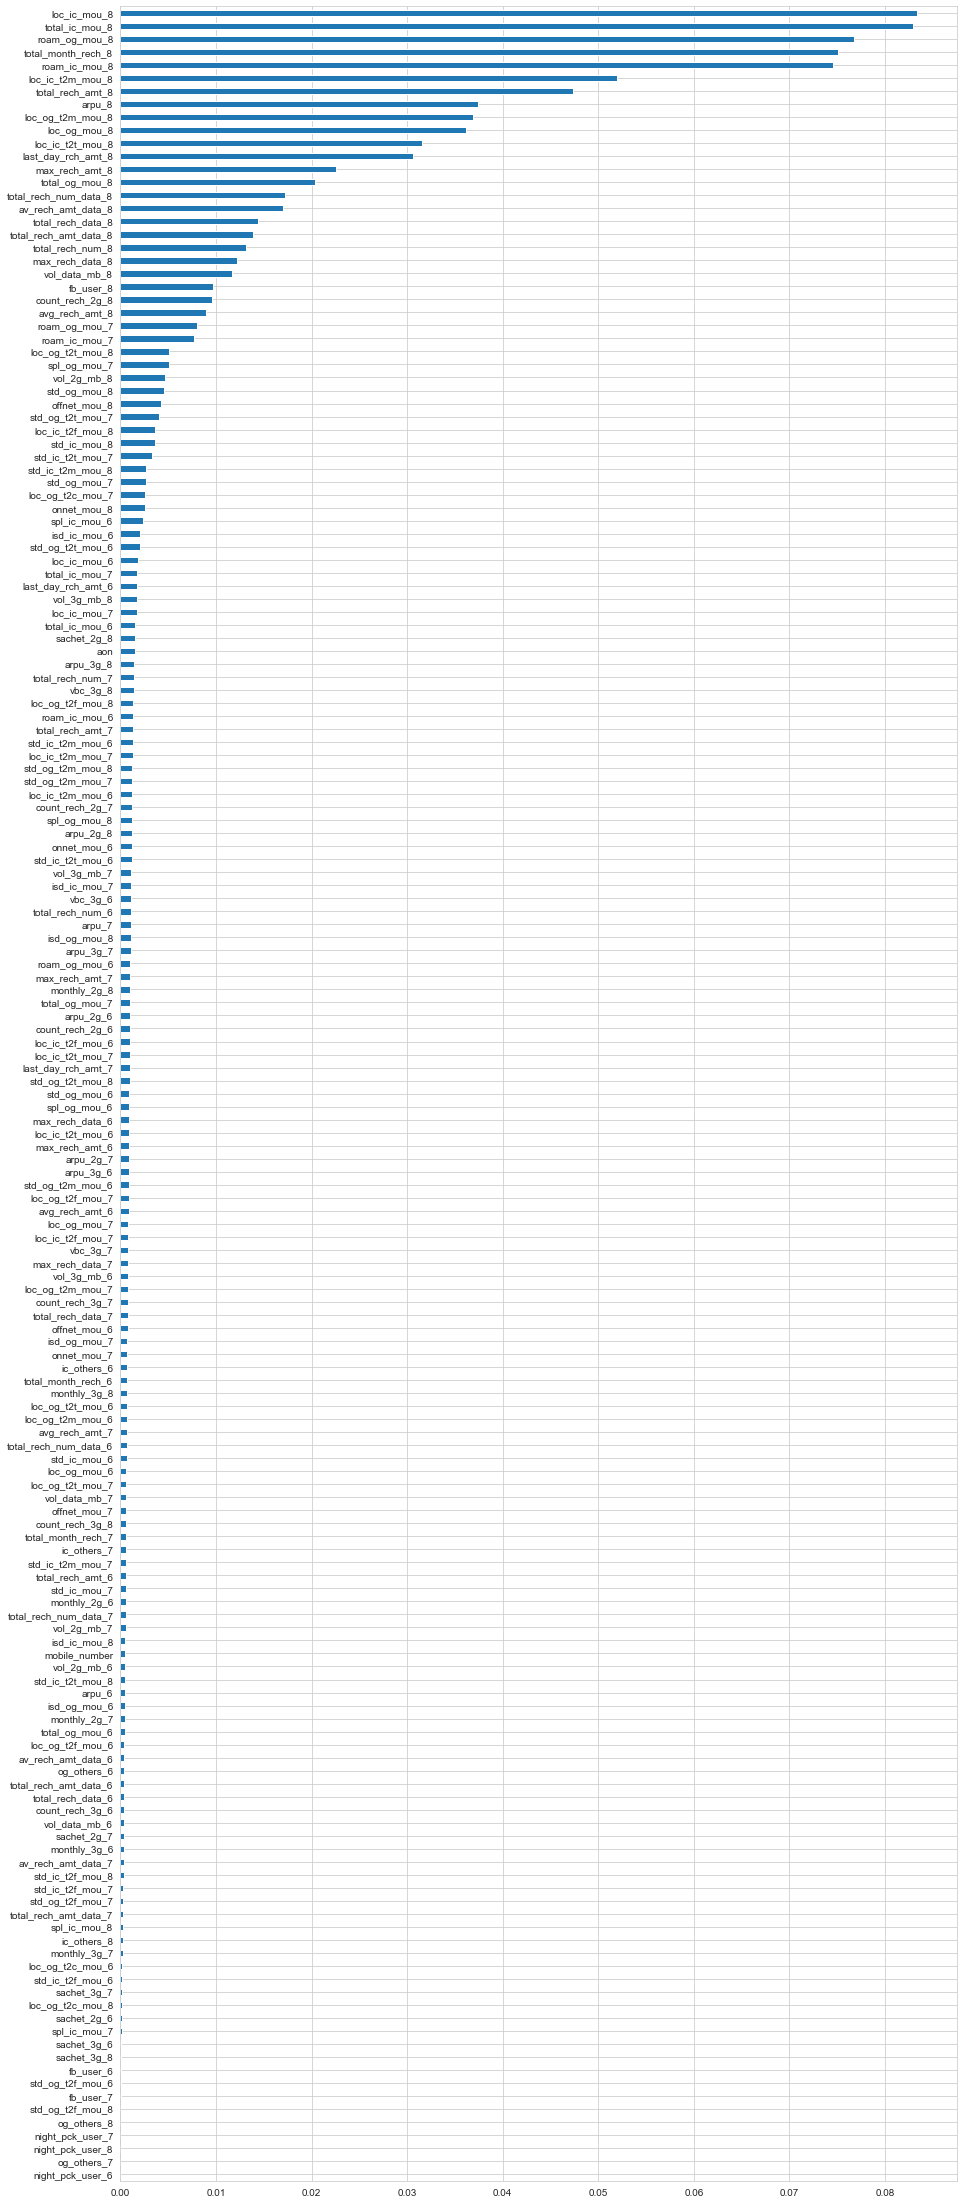

In [236]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

**From the graph we can identify the below top 15 features which contributs to churn a customer**

1.	**loc_ic_mou_8**		    -- *local incoming minutes of usage in month 8*
2.	**total_ic_mou_8**		    -- *Total incoming minutes of usage in month 8*
3.	**roam_og_mou_8**	        -- *Total outgoing roaming minutes of usage in month 8*
4.	**total_month_rech_8**	    -- *Total month recharge amount in month 8*
5.	**roam_ic_mou_8**	        -- *Total Incoming roaming minutes of usage in month 8*
6.	**loc_ic_t2m_mou_8**	    -- *local incoming calls minutes of usage to other operator mobile in month 8*
7.	**total_rech_amt_8**	    -- *total recharge amount in month 8*
8.	**arpu_8**		            -- *average revenue per user in month 8*
9.	**loc_og_t2m_mou_8**	    -- *local outgoing calls minutes of usage to other operator mobile in month 8*
10.	**loc_og_mou_8**	        -- *local outgoing calls minutes of usage in month 8*
11.	**loc_ic_t2t_mou_8**	    -- *local incoming calls from same operator minutes of usage in month 8*
12.	**last_day_rch_amt_8**	    -- *last (most recent) recharge amount in month 8*
13.	**max_rech_amt_8**		    -- *maximum recharge amount in month 8*
14.	**total_og_mou_8**		    -- *Total outgoing minutes of usage in month 8*
15.	**total_rech_num_data_8**	-- *total number of data recharges done in the month 8*

**Overall we can say value reduction in any of the above variables signifies churning of a customer**

### Best on above features importance, we can adopt following strategies to reduce churn rate

<ol>
    <li>As we are having <b>total_og_mou_8</b> and <b>total_month_rech_8</b> in inportant feature list that menas we can introduce some outgoing offer for high value customer so that outgoing calls get increase hence churn rate will decrease</li>
    <li>As we are having <b>roam_og_mou_8</b> and <b>roam_ic_mou_8</b> in inportant feature list that menas we can introduce some roaming offer for both incoming and outgoing for high value customer so that roaming calls get increase hence churn rate will decrease</li>
    <li>As we are having <b>total_rech_num_data_8</b> in inportant feature list that menas we can introduce some data recharge offer for high value customer so that data usage get increase hence churn rate will decrease</li>
    <li>As we are having <b>last_day_rch_amt_8</b> in inportant feature list that menas we can introduce soem new recharge which is having more number of days recharge validity for high value customer so that recharge amount will be big and validity will be more hence churn rate will decrease</li>
</ol>